In [16]:
import numpy as np
import sys
sys.path.insert(1,'../../src')
from _generate_time_series import *
from _shear_frame import *
from utils_OB import *
from _clustering import *
import _tracking as tk
from utils_JK import *
import seaborn as sns
sns.set_theme(context='paper',font_scale=1.0, style = 'ticks', color_codes='deep')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data_true = np.load('./test_results_flipped/test_3_true_flipped.npz',allow_pickle=True)
true_f = data_true['arr_0']
true_phi = data_true['arr_1']

### Magalhaes 2008

In [14]:
def print_averages(averages):
    print(' & '+str(int(averages[0]))+' & \missed{'+str(int(averages[1])) +'} & \mfalse{'+  str(int(averages[2])) +
              '} & '+ str(int(averages[3]))+' & \percent{'+ str(int(averages[4]))+ '}\% & \mbadpercent{' + str(int(averages[5]))+ 
                '}\% & '+str(int(averages[6]))+' & \missed{'+str(int(averages[7]))+'} & \mfalse{'+ str(int(averages[8]))+'} & '
                  + str(int(averages[9])) +' & \percent{'+ str(int(averages[10]))+'}\% & \mbadpercent{'+str(int(averages[11]))+
                    "}\% \\"+ "\\")

In [15]:
averages = []

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_below[0]) == 2:

        mode_traces_magalhaesi_below = tk.perform_tracking_magalhaes2008(freqs_out_below, phis_out_below)
        mode_traces_magalhaesi_below_sorted = tk.sort_traces(mode_traces_magalhaesi_below, true_f[0,:2], true_phi[:2,:,0])

        postprocessMagalhaes = tk.ModeTracesPostProcess(mode_traces_magalhaesi_below_sorted,freqs_out_below, phis_out_below, true_f[:,:2], true_phi[:2,:,:], algorithm='magalhaes2008', df_threshold=0.15, dmac_threshold=0.2)

        postprocessMagalhaes.calculate_performance_measure()
        
        average_row = postprocessMagalhaes.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

print('\n \n \n \n \n')

averages = []

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_above[0]) == 2:
        
        mode_traces_magalhaesi_above = tk.perform_tracking_magalhaes2008(freqs_out_above, phis_out_above)
        mode_traces_magalhaesi_above_sorted = tk.sort_traces(mode_traces_magalhaesi_above, true_f[0,2:], true_phi[2:,:,0])

        postprocessMagalhaes = tk.ModeTracesPostProcess(mode_traces_magalhaesi_above_sorted,freqs_out_above, phis_out_above, true_f[:,2:], true_phi[2:,:,:], algorithm='magalhaes2008', df_threshold=0.15, dmac_threshold=0.2)

        postprocessMagalhaes.calculate_performance_measure()

        average_row = postprocessMagalhaes.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)


4 & 55 & \missed{39} & \mfalse{19} & 35 & \percent{29}\% & \mbadpercent{54}\% & 66 & \missed{36} & \mfalse{7} & 37 & \percent{45}\% & \mbadpercent{18}\% \\
6 & 58 & \missed{12} & \mfalse{3} & 49 & \percent{79}\% & \mbadpercent{6}\% & 71 & \missed{43} & \mfalse{15} & 43 & \percent{39}\% & \mbadpercent{34}\% \\
9 & 49 & \missed{25} & \mfalse{15} & 39 & \percent{48}\% & \mbadpercent{38}\% & 60 & \missed{23} & \mfalse{9} & 46 & \percent{61}\% & \mbadpercent{19}\% \\
12 & 58 & \missed{23} & \mfalse{6} & 41 & \percent{60}\% & \mbadpercent{14}\% & 65 & \missed{23} & \mfalse{10} & 52 & \percent{64}\% & \mbadpercent{19}\% \\
14 & 53 & \missed{43} & \mfalse{16} & 26 & \percent{18}\% & \mbadpercent{61}\% & 64 & \missed{34} & \mfalse{16} & 46 & \percent{46}\% & \mbadpercent{34}\% \\
16 & 55 & \missed{20} & \mfalse{6} & 41 & \percent{63}\% & \mbadpercent{14}\% & 65 & \missed{25} & \mfalse{11} & 51 & \percent{61}\% & \mbadpercent{21}\% \\
18 & 52 & \missed{37} & \mfalse{24} & 39 & \percent{28}\% & \

In [9]:
data = np.load('./test_results_flipped/test_3_run_'+str(27)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [10]:
freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

mode_traces_magalhaes_above = tk.perform_tracking_magalhaes2008(freqs_out_above, phis_out_above)
mode_traces_magalhaes_below = tk.perform_tracking_magalhaes2008(freqs_out_below, phis_out_below)

mode_traces_magalhaes_above_sorted = tk.sort_traces(mode_traces_magalhaes_above, true_f[0,2:], true_phi[2:,:,0])
mode_traces_magalhaes_below_sorted = tk.sort_traces(mode_traces_magalhaes_below, true_f[0,:2], true_phi[:2,:,0])

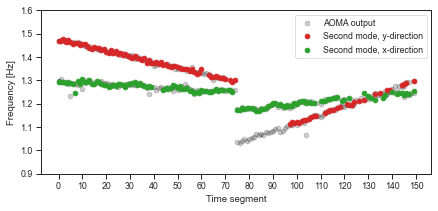

In [48]:
fig, axs = plt.subplots(figsize = (7,3))


for k, freq in enumerate(freqs_out):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

# for i, trace in enumerate(mode_traces_magalhaes_above):
#     axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

axs.scatter(mode_traces_magalhaes_above_sorted[0].time_seg, mode_traces_magalhaes_above_sorted[0].frequencies, label = 'Second mode, y-direction', color = 'tab:red')
axs.scatter(mode_traces_magalhaes_above_sorted[1].time_seg, mode_traces_magalhaes_above_sorted[1].frequencies, label = 'Second mode, x-direction', color = 'tab:green')


axs.set_xticks(np.arange(0, 151,10))
axs.set_ylim((0.9, 1.6))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

fig.savefig('./figures_flipped/maghalhaes2008_tracking', dpi = 400, bbox_inches = 'tight')

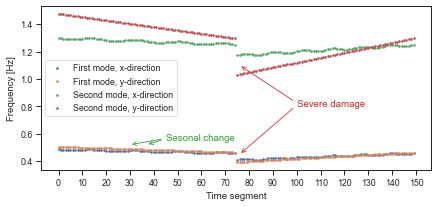

In [134]:
fig, axs = plt.subplots(figsize = (7,3))


axs.scatter(np.arange(0, 150, 1), true_f[:,1], label = 'First mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,0], label = 'First mode, y-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,3], label = 'Second mode, x-direction', s = 3)
axs.scatter(np.arange(0, 150, 1), true_f[:,2], label = 'Second mode, y-direction', s = 3)

axs.annotate('Severe damage',xy=(75, 0.8),xytext=(100, 0.8), color ='tab:red')
axs.annotate(text = ' ',xy=(76, 1.1), xytext=(100, 0.8),
            arrowprops=dict(arrowstyle='->', color='tab:red'))
axs.annotate(text = ' ',xy=(76, 0.45), xytext=(100, 0.8),
            arrowprops=dict(arrowstyle='->', color='tab:red'))

axs.annotate('Sesonal change',xy=(40, 0.5),xytext=(45, 0.55), color = 'tab:green')
axs.annotate(text = ' ',xy=(30, 0.52), xytext=(45, 0.55),
            arrowprops=dict(arrowstyle='->', color='tab:green'))
axs.annotate(text = ' ',xy=(37, 0.52), xytext=(45, 0.55),
            arrowprops=dict(arrowstyle='->', color='tab:green'))


axs.set_xticks(np.arange(0, 151, 10))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

fig.savefig('./figures_flipped/analytical_mode_evolution_num_case', dpi = 400, bbox_inches = 'tight')

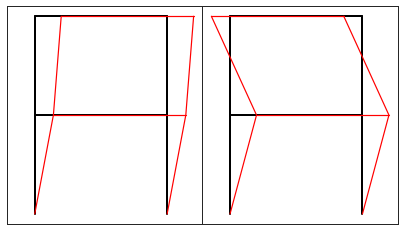

In [99]:
fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(1,2, wspace=0)
ax = gs.subplots(sharex=True, sharey=False)

ax[0].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

phi0 = np.insert(true_phi[1,:,0][:2], 0, 0)
phi1 = np.insert(true_phi[3,:,0][:2], 0, 0)

scale = 0.2

ax[0].plot([-0.5, -0.5], [0, 2], color = 'black', linewidth = 2)
ax[0].plot([0.5, 0.5], [0, 2], color = 'black', linewidth = 2)
ax[0].plot([-0.5, 0.5], [2, 2], color = 'black', linewidth = 2)
ax[0].plot([-0.5, 0.5], [1, 1], color = 'black', linewidth = 2)

ax[0].plot(phi0*scale + 0.5, np.arange(0, 3), color = 'red')
ax[0].plot(phi0*scale - 0.5, np.arange(0, 3), color = 'red')
ax[0].plot([phi0[1]*scale - 0.5, phi0[1]*scale + 0.5], [1, 1], color = 'red')
ax[0].plot([phi0[2]*scale - 0.5, phi0[2]*scale + 0.5], [2, 2], color = 'red')

ax[1].plot([-0.5, -0.5], [0, 2], color = 'black', linewidth = 2)
ax[1].plot([0.5, 0.5], [0, 2], color = 'black', linewidth = 2)
ax[1].plot([-0.5, 0.5], [2, 2], color = 'black', linewidth = 2)
ax[1].plot([-0.5, 0.5], [1, 1], color = 'black', linewidth = 2)

ax[1].plot(phi1*scale + 0.5, np.arange(0, 3), color = 'red')
ax[1].plot(phi1*scale - 0.5, np.arange(0, 3), color = 'red')
ax[1].plot([phi1[1]*scale - 0.5, phi1[1]*scale + 0.5], [1, 1], color = 'red')
ax[1].plot([phi1[2]*scale - 0.5, phi1[2]*scale + 0.5], [2, 2], color = 'red')

fig.savefig('./figures/analytical_phi_frame',dpi = 300, bbox_inches = 'tight')

In [135]:
phi00 = true_phi[0,:,0]
phi10 = true_phi[1,:,0]
phi20 = true_phi[2,:,0]
phi30 = true_phi[3,:,0]

print(phi00)
print(phi10)
print(phi20)
print(phi30)

mac0 = np.zeros(149)
mac1 = np.zeros(149)
mac2 = np.zeros(149)
mac3 = np.zeros(149)

for i, k in enumerate(np.arange(1,150)):
    mac0[i] = MAC(phi00, true_phi[0,:,k])
    mac1[i] = MAC(phi10, true_phi[1,:,k])
    mac2[i] = MAC(phi20, true_phi[2,:,k])
    mac3[i] = MAC(phi30, true_phi[3,:,k])


[0.         0.         0.72075922 1.        ]
[0.63979029 1.         0.         0.        ]
[ 0.          0.          1.         -0.72075922]
[ 1.         -0.63979029  0.          0.        ]


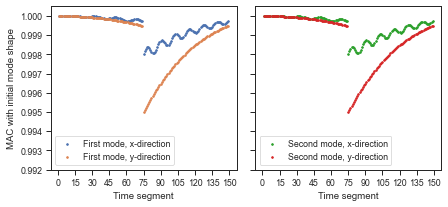

In [141]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,2, wspace=0.1)
ax = gs.subplots(sharex=True, sharey=True)

ax[0].scatter(np.arange(1, 150), mac1, label = 'First mode, x-direction', s = 3)
ax[0].scatter(np.arange(1, 150), mac0, label = 'First mode, y-direction', s = 3)
ax[1].scatter(np.arange(1, 150), mac3, label = 'Second mode, x-direction', color = 'tab:green', s = 3)
ax[1].scatter(np.arange(1, 150), mac2, label = 'Second mode, y-direction', color = 'tab:red', s = 3)

ax[0].set_xticks(np.arange(0, 151, 15))
ax[0].set_xlabel('Time segment')
ax[0].set_ylabel('MAC with initial mode shape')

ax[0].legend(loc='lower left')

ax[1].set_xticks(np.arange(0, 151, 15))
ax[1].set_xlabel('Time segment')

ax[0].set_ylim([0.992, 1.0005])
ax[1].legend(loc='lower left')


fig.savefig('./figures_flipped/analytical_phi_evolution_num_case', dpi = 400, bbox_inches = 'tight')

In [25]:
data = np.load('./test_results_flipped/test_3_run_'+str(0)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

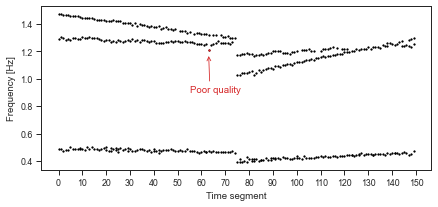

In [29]:
fig,ax =plt.subplots(figsize=(7,3))
for segment_number,freq in enumerate(freqs_out):
    if segment_number == 63: 
        ax.scatter(np.ones_like(freq)*segment_number,
               freq,color='black',s=2)
        ax.scatter(63, freq[1], color = 'tab:red', s=2)
    else:
        ax.scatter(np.ones_like(freq)*segment_number,
               freq,color='black',s=2)

ax.annotate('Poor quality',xy=(63, 1.18),xytext=(55, 0.9), color ='tab:red')
ax.annotate(text = ' ',xy=(63, 1.18), xytext=(63, 0.9),
            arrowprops=dict(arrowstyle='->', color='tab:red'))        

ax.set_xticks(np.arange(0, 151, 10))
ax.set_xlabel('Time segment')
ax.set_ylabel('Frequency [Hz]')
plt.show()

fig.savefig('./figures_flipped/poles_left_after_clustering_testcase', dpi = 400, bbox_inches = 'tight')

### He 2022

In [124]:
averages = []

n_omitted_runs = 0

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_below[0]) == 2:

        mode_traces_he_below = tk.perform_tracking_He2022(freqs_out_below, phis_out_below)
        mode_traces_he_below_sorted = tk.sort_traces(mode_traces_he_below, true_f[0,:2], true_phi[:2,:,0])

        postprocesshe = tk.ModeTracesPostProcess(mode_traces_he_below_sorted,freqs_out_below, phis_out_below, true_f[:,:2], true_phi[:2,:,:], algorithm='he2022', df_threshold=0.15, dmac_threshold=0.2)

        postprocesshe.calculate_performance_measure()

        average_row = postprocesshe.latex_format(run+1)

        averages.append(average_row)
    
    else:
        n_omitted_runs += 1

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

print('Number of omitted runs: \missed{'+str(int(n_omitted_runs))+'}')

print('\n \n \n \n \n')

averages = []

n_omitted_runs = 0

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_above[0]) == 2:
        
        mode_traces_he_above = tk.perform_tracking_He2022(freqs_out_above, phis_out_above)
        mode_traces_he_above_sorted = tk.sort_traces(mode_traces_he_above, true_f[0,2:], true_phi[2:,:,0])

        postprocesshe = tk.ModeTracesPostProcess(mode_traces_he_above_sorted,freqs_out_above, phis_out_above, true_f[:,2:], true_phi[2:,:,:], algorithm='he2022', df_threshold=0.15, dmac_threshold=0.2)

        postprocesshe.calculate_performance_measure()

        average_row = postprocesshe.latex_format(run+1)

        averages.append(average_row)

    else:
        n_omitted_runs += 1


averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

print('Number of omitted runs: \missed{'+str(int(n_omitted_runs))+'}')

4 & 57 & \missed{19} & \mfalse{46} & 84 & \percent{66}\% & \mbadpercent{54}\% & 70 & \missed{23} & \mfalse{42} & 89 & \percent{67}\% & \mbadpercent{47}\% \\
6 & 59 & \missed{10} & \mfalse{42} & 91 & \percent{83}\% & \mbadpercent{46}\% & 82 & \missed{18} & \mfalse{27} & 91 & \percent{78}\% & \mbadpercent{29}\% \\
9 & 57 & \missed{23} & \mfalse{53} & 87 & \percent{59}\% & \mbadpercent{60}\% & 60 & \missed{26} & \mfalse{59} & 93 & \percent{56}\% & \mbadpercent{63}\% \\
12 & 64 & \missed{16} & \mfalse{35} & 83 & \percent{75}\% & \mbadpercent{42}\% & 71 & \missed{13} & \mfalse{34} & 92 & \percent{81}\% & \mbadpercent{36}\% \\
14 & 52 & \missed{25} & \mfalse{58} & 85 & \percent{51}\% & \mbadpercent{68}\% & 61 & \missed{27} & \mfalse{61} & 95 & \percent{55}\% & \mbadpercent{64}\% \\
16 & 69 & \missed{13} & \mfalse{29} & 85 & \percent{81}\% & \mbadpercent{34}\% & 80 & \missed{16} & \mfalse{29} & 93 & \percent{80}\% & \mbadpercent{31}\% \\
18 & 63 & \missed{22} & \mfalse{36} & 77 & \percent{65}

In [18]:
data = np.load('./test_results_flipped/test_3_run_'+str(3)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [19]:
freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

mode_traces_he_above = tk.perform_tracking_He2022(freqs_out_above, phis_out_above)
mode_traces_he_below = tk.perform_tracking_He2022(freqs_out_below, phis_out_below)

mode_traces_he_above_sorted = tk.sort_traces(mode_traces_he_above, true_f[0,2:], true_phi[2:,:,0])
mode_traces_he_below_sorted = tk.sort_traces(mode_traces_he_below, true_f[0,:2], true_phi[:2,:,0])

In [63]:
# for i, t in enumerate(mode_traces_he_below_sorted[0].time_seg):
#     phi = mode_traces_he_below_sorted[0].mode_shapes[i]

#     print(np.real(phi), t) 

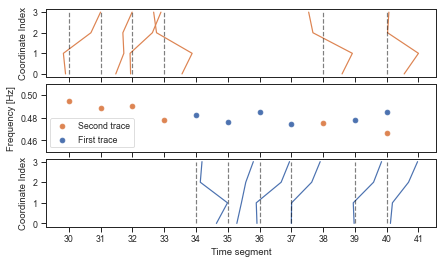

In [30]:
id_trace_00 = np.where(np.array(mode_traces_he_below_sorted[0].time_seg) <= 40)[0]
id_trace_01 = np.where(np.array(mode_traces_he_below_sorted[0].time_seg) >= 30)[0]

id_trace_10 = np.where(np.array(mode_traces_he_below_sorted[1].time_seg) <= 40)[0]
id_trace_11 = np.where(np.array(mode_traces_he_below_sorted[1].time_seg) >= 30)[0]

id_trace_0 = np.intersect1d(id_trace_00, id_trace_01)
id_trace_1 = np.intersect1d(id_trace_10, id_trace_11)

fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(3, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[2].set_xticks(np.arange(30, 42, 1))
axs[0].set_yticks(np.arange(0, 4, 1))
axs[2].set_yticks(np.arange(0, 4, 1))

axs[1].scatter(np.array(mode_traces_he_below_sorted[0].time_seg)[id_trace_0], np.array(mode_traces_he_below_sorted[0].frequencies)[id_trace_0], color = 'C1', label = 'Second trace')
axs[1].scatter(np.array(mode_traces_he_below_sorted[1].time_seg)[id_trace_1], np.array(mode_traces_he_below_sorted[1].frequencies)[id_trace_1], color = 'C0', label = 'First trace')

for i, id0 in enumerate(id_trace_0):
    phi0 = np.real(np.array(mode_traces_he_below_sorted[0].mode_shapes)[id0])
    if i > 2:
        axs[0].plot(phi0 + np.array(mode_traces_he_below_sorted[0].time_seg)[id0], np.arange(0, 4, 1), color = 'C1')
        axs[0].plot([np.array(mode_traces_he_below_sorted[0].time_seg)[id0],np.array(mode_traces_he_below_sorted[0].time_seg)[id0]],[0,3], color = 'black', linestyle = 'dashed', alpha = 0.5)
    else:
        axs[0].plot(phi0 + np.array(mode_traces_he_below_sorted[0].time_seg)[id0], np.arange(0, 4, 1), color = 'C1')
        axs[0].plot([np.array(mode_traces_he_below_sorted[0].time_seg)[id0],np.array(mode_traces_he_below_sorted[0].time_seg)[id0]],[0,3], color = 'black', linestyle = 'dashed', alpha = 0.5)
    

for i, id1 in enumerate(id_trace_1):
    phi1 = np.real(np.array(mode_traces_he_below_sorted[1].mode_shapes)[id1])
    if i > 0: 
        axs[2].plot(phi1 + np.array(mode_traces_he_below_sorted[1].time_seg)[id1], np.arange(0, 4, 1), color = 'C0')
        axs[2].plot([np.array(mode_traces_he_below_sorted[1].time_seg)[id1],np.array(mode_traces_he_below_sorted[1].time_seg)[id1]],[0,3], color = 'black', linestyle = 'dashed', alpha = 0.5)
    else:
        axs[2].plot(phi1 + np.array(mode_traces_he_below_sorted[1].time_seg)[id1], np.arange(0, 4, 1), color = 'C0')
        axs[2].plot([np.array(mode_traces_he_below_sorted[1].time_seg)[id1],np.array(mode_traces_he_below_sorted[1].time_seg)[id1]],[0,3], color = 'black', linestyle = 'dashed', alpha = 0.5)

axs[2].set_xlabel('Time segment')

axs[0].set_ylabel('Coordinate Index')
axs[1].set_ylabel('Frequency [Hz]')
axs[2].set_ylabel('Coordinate Index')

axs[1].set_ylim((0.45,0.51))

axs[1].legend()

fig.savefig('./figures_flipped/he2022_trace_switch', dpi = 400, bbox_inches = 'tight')

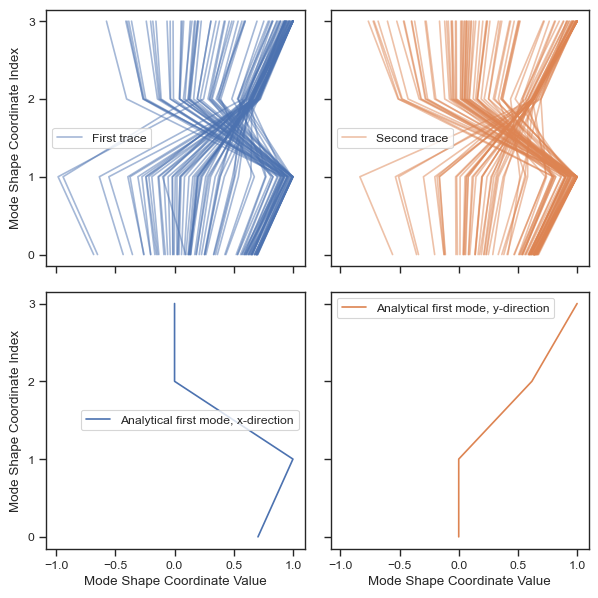

In [5]:
#fig, axs = plt.subplots(2, 2, figsize = (16,16), sharex=True, sharey=False)

fig = plt.figure(figsize=(7,7))
gs = fig.add_gridspec(2,2, hspace=0.1, wspace=0.1)
axs = gs.subplots(sharex=True, sharey=True)

#print(np.array(mode_traces_he_below[0].mode_shapes).T)

#phisT = koma.modal.normalize_phi(np.array(mode_traces_he_below[0].mode_shapes).T)[0]
#phis = phisT.T

for i, phi in enumerate(mode_traces_he_below[0].mode_shapes):
    if i == 0: axs[0, 0].plot(np.real(phi), np.arange(0, 4, 1), color = 'C0', alpha = 0.5, label = 'First trace')
    axs[0, 0].plot(np.real(phi), np.arange(0, 4, 1), color = 'C0', alpha = 0.5)

for i, phi in enumerate(mode_traces_he_below[1].mode_shapes):
    if i == 0: axs[0, 1].plot(np.real(phi), np.arange(0, 4, 1), color = 'C1', alpha = 0.5, label = 'Second trace')
    axs[0, 1].plot(np.real(phi), np.arange(0, 4, 1), color = 'C1', alpha = 0.5)

axs[1,0].plot(true_phi[1,:,0], np.arange(0, 4, 1), label = 'Analytical first mode, x-direction')
axs[1,1].plot(true_phi[0,:,0], np.arange(0, 4, 1), label = 'Analytical first mode, y-direction', color = 'C1')

axs[0,0].set_yticks(np.arange(0, 4, 1))
axs[0,1].set_yticks(np.arange(0, 4, 1))
axs[1,0].set_yticks(np.arange(0, 4, 1))
axs[1,1].set_yticks(np.arange(0, 4, 1))

axs[0,0].set_ylabel('Mode Shape Coordinate Index')
axs[1,0].set_ylabel('Mode Shape Coordinate Index')

axs[1,0].set_xlabel('Mode Shape Coordinate Value')
axs[1,1].set_xlabel('Mode Shape Coordinate Value')

axs[1,0].legend()
axs[1,1].legend()
axs[0,0].legend()
axs[0,1].legend()

# fig.savefig('./figures/he2022_modeshapes', dpi = 400, bbox_inches = 'tight')

C:\Users\olebj\AppData\Local\Temp\ipykernel_8940\4104033093.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


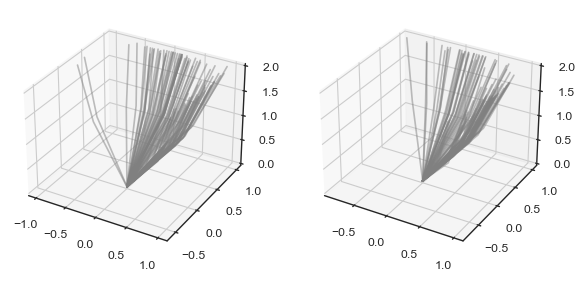

In [17]:


### OBs testplot 





# matplotlib.use('Qtagg')
phi1=mode_traces_he_below[0].mode_shapes
phi2=mode_traces_he_below[1].mode_shapes

# print(phi1)
subplot_kw={'projection':'3d'}
fig,axs=plt.subplots(1,2,figsize=(7,4),subplot_kw=subplot_kw)
for phi in phi1:
    phi=np.insert(phi,0,0)
    phi=np.real(np.insert(phi,3,0))
    # print(phi)
    axs[0].plot(phi[:3],
                phi[3:],
                zs=[0,1,2],color='grey',alpha=0.5)
    
    
for phi in phi2:
    phi=np.insert(phi,0,0)
    phi=np.real(np.insert(phi,3,0))
    # print(phi)
    axs[1].plot(phi[:3],
                phi[3:],
                zs=[0,1,2],color='grey',alpha=0.5)

####

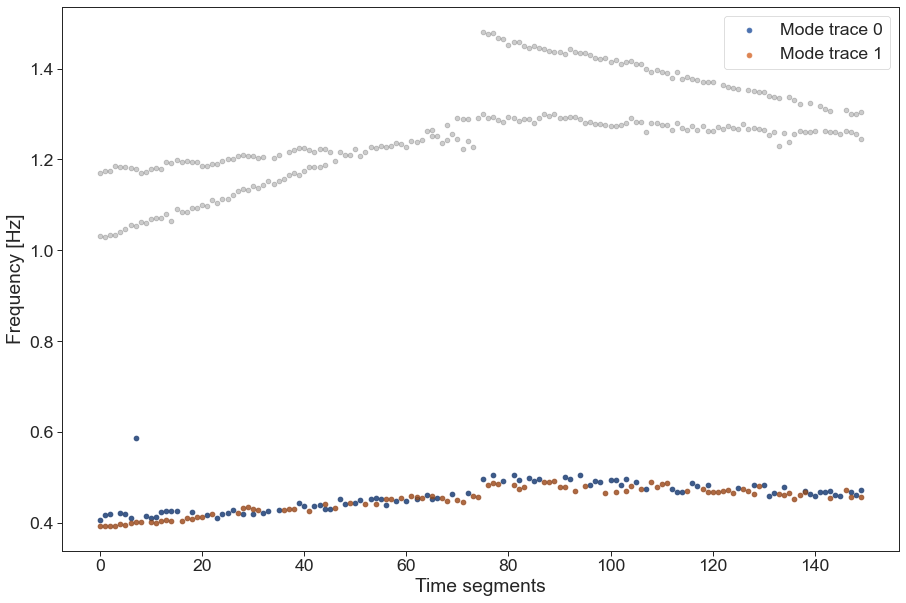

In [5]:
fig, axs = plt.subplots(figsize = (15,10))

for i, trace in enumerate(mode_traces_he_below):
    axs.scatter(trace.time_seg, trace.frequencies, label = 'Mode trace {}'.format(i))

for k, freq in enumerate(freqs_out):
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

axs.set_xlabel('Time segments')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

### Cabboi 2016

In [126]:
averages = []

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_below[0]) == 2:

        mode_traces_cabboi_below = tk.perform_tracking_cabboi(freqs_out_below, phis_out_below, ref_mode_frequenciesHz=freqs_out_below[0], ref_mode_modeshapes=phis_out_below[0])
        mode_traces_cabboi_below_sorted = tk.sort_traces(mode_traces_cabboi_below, true_f[0,:2], true_phi[:2,:,0])

        postprocesscabboi = tk.ModeTracesPostProcess(mode_traces_cabboi_below_sorted,freqs_out_below, phis_out_below, true_f[:,:2], true_phi[:2,:,:], algorithm='cabboi2016', df_threshold=0.15, dmac_threshold=0.2)

        postprocesscabboi.calculate_performance_measure()

        average_row = postprocesscabboi.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)


print('\n \n \n \n \n')

averages = []

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    if len(freqs_out_above[0]) == 2:
        
        mode_traces_cabboi_above = tk.perform_tracking_cabboi(freqs_out_above, phis_out_above,freqs_out_above[0], phis_out_above[0])
        mode_traces_cabboi_above_sorted = tk.sort_traces(mode_traces_cabboi_above, true_f[0,2:], true_phi[2:,:,0])

        postprocesscabboi = tk.ModeTracesPostProcess(mode_traces_cabboi_above_sorted,freqs_out_above, phis_out_above, true_f[:,2:], true_phi[2:,:,:], algorithm='cabboi2016', df_threshold=0.15, dmac_threshold=0.2)

        postprocesscabboi.calculate_performance_measure()

        average_row = postprocesscabboi.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

4 & 57 & \missed{20} & \mfalse{6} & 43 & \percent{64}\% & \mbadpercent{13}\% & 66 & \missed{6} & \mfalse{12} & 72 & \percent{90}\% & \mbadpercent{16}\% \\
6 & 58 & \missed{19} & \mfalse{4} & 43 & \percent{67}\% & \mbadpercent{9}\% & 73 & \missed{14} & \mfalse{20} & 79 & \percent{80}\% & \mbadpercent{25}\% \\
9 & 51 & \missed{11} & \mfalse{8} & 48 & \percent{78}\% & \mbadpercent{16}\% & 60 & \missed{10} & \mfalse{5} & 55 & \percent{83}\% & \mbadpercent{9}\% \\
12 & 58 & \missed{9} & \mfalse{14} & 63 & \percent{84}\% & \mbadpercent{22}\% & 65 & \missed{7} & \mfalse{11} & 69 & \percent{89}\% & \mbadpercent{15}\% \\
14 & 53 & \missed{16} & \mfalse{8} & 45 & \percent{69}\% & \mbadpercent{17}\% & 65 & \missed{6} & \mfalse{8} & 67 & \percent{90}\% & \mbadpercent{11}\% \\
16 & 55 & \missed{25} & \mfalse{19} & 49 & \percent{54}\% & \mbadpercent{38}\% & 65 & \missed{2} & \mfalse{14} & 77 & \percent{96}\% & \mbadpercent{18}\% \\
18 & 59 & \missed{20} & \mfalse{12} & 51 & \percent{66}\% & \mbadper

In [49]:
data = np.load('./test_results_flipped/test_3_run_'+str(24)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [50]:
freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

mode_traces_cabboi_above = tk.perform_tracking_cabboi(freqs_out_above, phis_out_above, ref_mode_frequenciesHz=freqs_out_above[0], ref_mode_modeshapes=phis_out_above[0])
mode_traces_cabboi_below = tk.perform_tracking_cabboi(freqs_out_below, phis_out_below, ref_mode_frequenciesHz=freqs_out_below[0], ref_mode_modeshapes=phis_out_below[0])

mode_traces_cabboi_above_sorted = tk.sort_traces(mode_traces_cabboi_above, true_f[0,2:], true_phi[2:,:,0])
mode_traces_cabboi_below_sorted = tk.sort_traces(mode_traces_cabboi_below, true_f[0,:2], true_phi[:2,:,0])

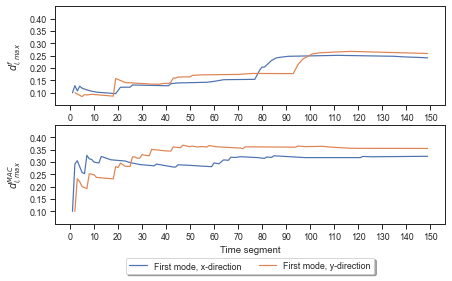

In [66]:
fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(2, hspace=0.2)
axs = gs.subplots(sharex=False, sharey=True)

init0 = 150 - len(mode_traces_cabboi_below_sorted[1].df_threshold_list)
init1 = 150 - len(mode_traces_cabboi_below_sorted[0].df_threshold_list)
init2 = 150 - len(mode_traces_cabboi_above_sorted[1].df_threshold_list)
init3 = 150 - len(mode_traces_cabboi_above_sorted[0].df_threshold_list)

axs[0].plot(np.arange(init0, 150, 1), mode_traces_cabboi_below_sorted[1].df_threshold_list, label = 'First mode, x-direction')
axs[0].plot(np.arange(init1, 150, 1), mode_traces_cabboi_below_sorted[0].df_threshold_list, label = 'First mode, y-direction')
# axs[0].plot(np.arange(init2, 150, 1), mode_traces_cabboi_above_sorted[1].df_threshold_list, label = 'Second mode, x-direction')
# axs[0].plot(np.arange(init2, 150, 1), mode_traces_cabboi_above_sorted[0].df_threshold_list, label = 'Second mode, y-direction')

axs[1].plot(np.arange(init0, 150, 1), mode_traces_cabboi_below_sorted[1].dmac_threshold_list, label = 'First mode, x-direction')
axs[1].plot(np.arange(init1, 150, 1), mode_traces_cabboi_below_sorted[0].dmac_threshold_list, label = 'First mode, y-direction')
# axs[1].plot(np.arange(init2, 150, 1), mode_traces_cabboi_above_sorted[1].dmac_threshold_list, label = 'Second mode, x-direction')
# axs[1].plot(np.arange(init3, 150, 1), mode_traces_cabboi_above_sorted[0].dmac_threshold_list, label = 'Second mode, y-direction')

axs[0].set_ylabel('$d_{i,max}^{f}$')
axs[0].set_xticks(np.arange(0,151,10))

axs[0].set_yticks(np.arange(0.1,0.41, 0.05))
axs[0].set_ylim([0.05, 0.45])

axs[1].set_ylabel('$d_{i,max}^{MAC}$')
axs[1].set_xticks(np.arange(0,151,10))
axs[1].set_xlabel('Time segment')

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)

fig.savefig('./figures_flipped/cabboi2016_dyn_thresholds', dpi = 400, bbox_inches = 'tight')

In [18]:
print(np.real(mode_traces_cabboi_below_sorted[1].mode_shapes[0]))
print(np.real(mode_traces_cabboi_below_sorted[0].mode_shapes[0]))
print(np.real(mode_traces_cabboi_above_sorted[1].mode_shapes[0]))
print(np.real(mode_traces_cabboi_above_sorted[0].mode_shapes[0]))

[ 0.70106862  0.99977923 -0.04014215 -0.06393476]
[-0.07702422 -0.10096603  0.60957017  0.9772193 ]
[ 0.99985766 -0.71071801  0.02559241 -0.01121542]
[-0.0435032   0.01479533  0.92845483 -0.61999574]


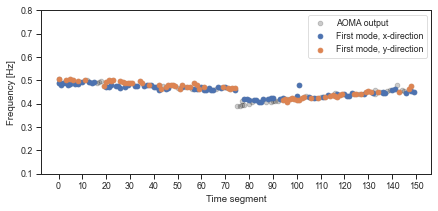

In [46]:
fig, axs = plt.subplots(figsize = (7,3))

for k, freq in enumerate(freqs_out):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)


axs.scatter(mode_traces_cabboi_below_sorted[1].time_seg, mode_traces_cabboi_below_sorted[1].frequencies, label = 'First mode, x-direction')
axs.scatter(mode_traces_cabboi_below_sorted[0].time_seg, mode_traces_cabboi_below_sorted[0].frequencies, label = 'First mode, y-direction')
# axs.scatter(mode_traces_cabboi_above_sorted[1].time_seg, mode_traces_cabboi_above_sorted[1].frequencies, label = 'Second mode, x-direction', color = 'g')
# axs.scatter(mode_traces_cabboi_above_sorted[0].time_seg, mode_traces_cabboi_above_sorted[0].frequencies, label = 'Second mode, y-direction', color = 'red')


axs.set_xticks(np.arange(0, 151,10))
axs.set_ylim((0.1, 0.8))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()

fig.savefig('./figures_flipped/cabboi2016_tracking', dpi = 300, bbox_inches = 'tight')

### Latex formating

In [ ]:
# run_above
# run_below
# n_missed_tot_below_magalhaes2008
# n_missed_tot_above_magalhaes2008
# n_missed_tot_above_He2022
# n_missed_tot_below_He2022
# n_missed_tot_above_cabboi
# n_missed_tot_below_cabboi

In [67]:
info_below = np.empty((18, 7))

info_below[:,0] = run_below

info_below[:,1:3] = n_missed_tot_below_magalhaes2008
info_below[:,3:5] = n_missed_tot_below_cabboi
info_below[:,5:7] = n_missed_tot_below_He2022

cnt = 0

for i, run, mode0m, mode1m, mode0c, mode1c, mode0h, mode1h in enumerate(info_below):
    print(str(int(run))+' & '+ str(int(mode0m)) +' & '+ str(int(mode1m))+' & '+ str(int(mode0c))+' & '+ str(int(mode1c))+' & '+ str(int(mode0h))+' & '+ str(int(mode1h))+" \\"+ "\\")



print('\n \n \n \n \n')

info_above = np.empty((50, 7))

info_above[:,0] = run_above

info_above[:,1:3] = n_missed_tot_above_magalhaes2008
info_above[:,3:5] = n_missed_tot_above_cabboi
info_above[:,5:7] = n_missed_tot_above_He2022

for run, mode0m, mode1m, mode0c, mode1c, mode0h, mode1h in info_above:
    print(str(int(run))+' & '+ str(int(mode0m)) +' & '+ str(int(mode1m))+' & '+ str(int(mode0c))+' & '+ str(int(mode1c))+' & '+ str(int(mode0h))+' & '+ str(int(mode1h))+" \\"+ "\\")


ValueError: could not broadcast input array from shape (13,) into shape (18,)

### Modal tracking concept 1

In [127]:
averages = []

n_omitted_runs = 0

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    n = 30

    mode_traces = tk.perform_tracking(freqs_outi, phis_outi, n = n, d_track_threshold=0.3, m = 11, method='average', split = True)
    mode_traces_sorted = tk.sort_traces(mode_traces, true_f[n,:], true_phi[:,:,n])

    if len(mode_traces) != 4:

        n_omitted_runs += 1

    else:
        freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

        postprocess = tk.ModeTracesPostProcess(mode_traces_sorted[:2],freqs_out_below, phis_out_below, true_f[:,:2], true_phi[:2,:,:], algorithm='proposed', df_threshold=0.1, dmac_threshold=0.2) 

        postprocess.calculate_performance_measure(n = 30)

        average_row = postprocess.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

print(n_omitted_runs)

print('\n \n \n \n \n')

averages = []

n_omitted_runs = 0

for run in range(50):

    datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    n = 30

    mode_traces = tk.perform_tracking(freqs_outi, phis_outi, n = n, d_track_threshold=0.3, m = 11, method='average', split = True)
    mode_traces_sorted = tk.sort_traces(mode_traces, true_f[n,:], true_phi[:,:,n])

    if len(mode_traces) != 4: 
        
        n_omitted_runs += 1

    else:
        freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

        postprocess = tk.ModeTracesPostProcess(mode_traces_sorted[2:],freqs_out_above, phis_out_above, true_f[:,2:], true_phi[2:,:,:], algorithm='proposed', df_threshold=0.1, dmac_threshold=0.2) 

        postprocess.calculate_performance_measure(n = 30)

        average_row = postprocess.latex_format(run+1)

        averages.append(average_row)

averages = np.array(averages)
averages = np.average(averages, axis = 0)

print_averages(averages)

print(n_omitted_runs)


2 & 53 & \missed{10} & \mfalse{2} & 45 & \percent{81}\% & \mbadpercent{4}\% & 51 & \missed{9} & \mfalse{5} & 47 & \percent{82}\% & \mbadpercent{10}\% \\
3 & 54 & \missed{7} & \mfalse{6} & 53 & \percent{87}\% & \mbadpercent{11}\% & 60 & \missed{11} & \mfalse{5} & 54 & \percent{81}\% & \mbadpercent{9}\% \\
5 & 41 & \missed{7} & \mfalse{3} & 37 & \percent{82}\% & \mbadpercent{8}\% & 54 & \missed{9} & \mfalse{1} & 46 & \percent{83}\% & \mbadpercent{2}\% \\
6 & 48 & \missed{1} & \mfalse{1} & 48 & \percent{97}\% & \mbadpercent{2}\% & 63 & \missed{5} & \mfalse{4} & 62 & \percent{92}\% & \mbadpercent{6}\% \\
7 & 50 & \missed{22} & \mfalse{11} & 39 & \percent{56}\% & \mbadpercent{28}\% & 52 & \missed{11} & \mfalse{4} & 45 & \percent{78}\% & \mbadpercent{8}\% \\
8 & 52 & \missed{6} & \mfalse{1} & 47 & \percent{88}\% & \mbadpercent{2}\% & 48 & \missed{4} & \mfalse{2} & 46 & \percent{91}\% & \mbadpercent{4}\% \\
9 & 44 & \missed{9} & \mfalse{9} & 44 & \percent{79}\% & \mbadpercent{20}\% & 50 & \mi

In [4]:
n_missed_tot_above_mtc1 = []
n_missed_tot_below_mtc1 = []

n_mtc1 = 30

run_above = np.array([])
run_below = np.array([])

for i in range(50):
    datai = np.load('./test_results/test_3_run_'+str(i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_outi_above, freqs_outi_below, phis_outi_above, phis_outi_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    mode_traces_mtc1_above = tk.perform_tracking(freqs_outi_above, phis_outi_above, n = n_mtc1, m = 11, d_track_threshold=0.3,method='average')
    if len(freqs_outi_above[0]) == 2:
        n_missed_tot_above_temp = []
        
        run_above = np.append(run_above, i)
        mode_traces_mtc1_above_sorted = tk.sort_traces(mode_traces_mtc1_above, true_f[0,2:], true_phi[2:,:,0])
        for j, trace in enumerate(mode_traces_mtc1_above_sorted):
            mode_traces_mtc1_above_sorted[j].count_missed_time_segments(freqs_outi_above[n_mtc1:],phis_outi_above[n_mtc1:], true_f[:,2:][n_mtc1:,j], true_phi[2:,:,n_mtc1:][j], lim = 0.3, n = n_mtc1)
            n_missed_tot_above_temp.append(trace.n_skipped_time_seg)

        n_missed_tot_above_mtc1.append(n_missed_tot_above_temp)

    mode_traces_mtc1_below = tk.perform_tracking(freqs_outi_below, phis_outi_below, n = n_mtc1, m = 11, d_track_threshold=0.3, method='average')
    if len(mode_traces_mtc1_below) == 2:
        n_missed_tot_below_temp = []
        run_below = np.append(run_below, i)
        mode_traces_mtc1_below_sorted = tk.sort_traces(mode_traces_mtc1_below, true_f[0,:2], true_phi[:2,:,0])
        for j, trace in enumerate(mode_traces_mtc1_below_sorted):
            mode_traces_mtc1_below_sorted[j].count_missed_time_segments(freqs_outi_below[n_mtc1:],phis_outi_below[n_mtc1:], true_f[:,:2][n_mtc1:,j], true_phi[:2,:,n_mtc1:][j], lim = 0.3, n = n_mtc1)
            n_missed_tot_below_temp.append(trace.n_skipped_time_seg)

        n_missed_tot_below_mtc1.append(n_missed_tot_below_temp)

In [3]:
n_missed_tot_mtc1 = []

n_mtc1 = 30

run = np.array([])

for i in range(40):
    datai = np.load('./test_results/test_3_run_'+str(i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    mode_traces_mtc1 = tk.perform_tracking(freqs_outi, phis_outi, n = n_mtc1, m = 11, d_track_threshold=0.3,method='average', split=True)

    # print('Run {}'.format(i))

    if len(mode_traces_mtc1) == 4:
        n_missed_tot_temp = []
        
        run = np.append(run, i)
        mode_traces_mtc1_sorted = tk.sort_traces(mode_traces_mtc1, true_f[n_mtc1,:], true_phi[:,:,n_mtc1])
        for j, trace in enumerate(mode_traces_mtc1_sorted):
            # print('First trace shape:')
            # print(np.real(trace.mode_shapes[0]))
            # print('Analytical shape:')
            # print(true_phi[j,:,n_mtc1])
            # print(true_f[n_mtc1,j])
            # print('-------------')
            mode_traces_mtc1_sorted[j].count_missed_time_segments(freqs_outi[n_mtc1:],phis_outi[n_mtc1:], true_f[n_mtc1:,j], true_phi[j,:,n_mtc1:], lim = 0.3, n = n_mtc1)
            n_missed_tot_temp.append(trace.n_skipped_time_seg)

        n_missed_tot_mtc1.append(n_missed_tot_temp)

    # plot_physical_traces(mode_traces_mtc1)
    # print(n_missed_tot_mtc1)
    # print('**************************')
    # break

In [51]:
data = np.load('./test_results/test_3_run_'+str(16)+'.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [48]:
n_test = 30

mode_traces_mtc1_test = tk.perform_tracking(freqs_out, phis_out, n = n_test, m = 11, d_track_threshold=0.3, split=True, method='average')

mode_traces_mtc1_test_sorted = tk.sort_traces(mode_traces_mtc1_test, true_f[n_test,:], true_phi[:,:,n_test])
for j, trace in enumerate(mode_traces_mtc1_test_sorted):
    mode_traces_mtc1_test_sorted[j].count_missed_time_segments(freqs_out[n_test:],phis_out[n_test:], true_f[n_test:,j], true_phi[j,:,n_test:], lim = 0.3, n = n_test)

In [62]:
freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

initial_mode_traces_mtc1_test = tk.get_initial_modes(freqs_out_below[:n_test], phis_out_below[:n_test])
next_mode_traces_mtc1_test = tk.perform_tracking(freqs_out[:n_test+11], phis_out[:n_test+11], n = n_test, m = 11, d_track_threshold=0.3, split=True, method='average')

In [63]:
print(initial_mode_traces_mtc1_test[0].ref_frequency)
print(initial_mode_traces_mtc1_test[1].ref_frequency)
print(initial_mode_traces_mtc1_test[2].ref_frequency)
print(initial_mode_traces_mtc1_test[3].ref_frequency)

0.405421155334412
0.4195225544290704


IndexError: index 2 is out of bounds for axis 0 with size 2

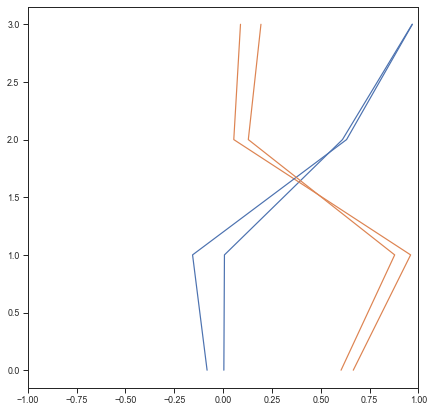

In [31]:
fig, ax = plt.subplots(figsize = (7,7))

ax.set_xlim((-1,1))

ax.plot(np.real(initial_mode_traces_mtc1_test[0].ref_mode_shape), range(4), color = 'C0', label = 'Mode trace 0')
ax.plot(np.real(initial_mode_traces_mtc1_test[1].ref_mode_shape), range(4), color = 'C1', label = 'Mode trace 1')

ax.plot(np.real(next_mode_traces_mtc1_test[0].ref_mode_shape), range(4), color = 'C0', label = 'Mode trace 0')
ax.plot(np.real(next_mode_traces_mtc1_test[1].ref_mode_shape), range(4), color = 'C1', label = 'Mode trace 1')

212
-----------
212
-----------
212
-----------
0
-----------


<AxesSubplot:xlabel='Time segments', ylabel='Frequency [Hz]'>

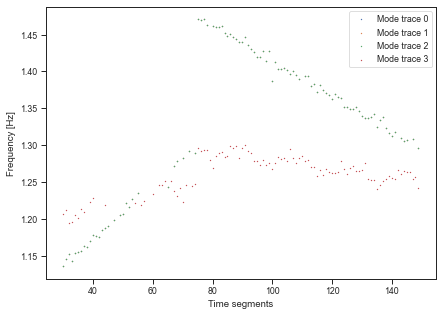

In [37]:
for j,trace in enumerate(mode_traces_mtc1_test_sorted):
    print(trace.n_skipped_time_seg)
    print('-----------')

plot_physical_traces(mode_traces_mtc1_test_sorted)

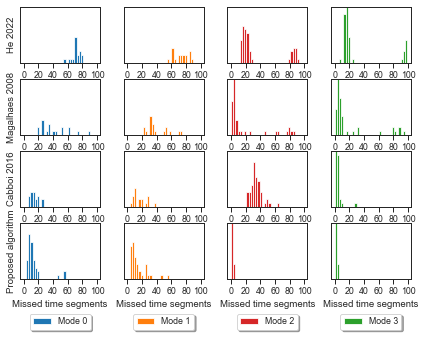

In [79]:
# print(np.array(n_missed_tot_mtc1))
mode0_mtc1 = np.array(n_missed_tot_mtc1)[:,0]
mode1_mtc1 = np.array(n_missed_tot_mtc1)[:,1]
mode2_mtc1 = np.array(n_missed_tot_mtc1)[:,2]
mode3_mtc1 = np.array(n_missed_tot_mtc1)[:,3]

mode0_magalhaes = np.array(n_missed_tot_below_magalhaes2008)[:,0]
mode1_magalhaes = np.array(n_missed_tot_below_magalhaes2008)[:,1]
mode2_magalhaes = np.array(n_missed_tot_above_magalhaes2008)[:,0]
mode3_magalhaes = np.array(n_missed_tot_above_magalhaes2008)[:,1]

mode0_cabboi = np.array(n_missed_tot_below_cabboi)[:,0]
mode1_cabboi = np.array(n_missed_tot_below_cabboi)[:,1]
mode2_cabboi = np.array(n_missed_tot_above_cabboi)[:,0]
mode3_cabboi = np.array(n_missed_tot_above_cabboi)[:,1]

mode0_he = np.array(n_missed_tot_below_He2022)[:,0]
mode1_he = np.array(n_missed_tot_below_He2022)[:,1]
mode2_he = np.array(n_missed_tot_above_He2022)[:,0]
mode3_he = np.array(n_missed_tot_above_He2022)[:,1]

fig, ax = plt.subplots(4, 4, figsize = (7,5), gridspec_kw={'wspace':0.3,'hspace':0.3}, sharey=True)

myBins = np.arange(0, 101, 3)

ax[3,0].set_xlabel('Missed time segments')
ax[3,1].set_xlabel('Missed time segments')
ax[3,2].set_xlabel('Missed time segments')
ax[3,3].set_xlabel('Missed time segments')

ax[0,0].hist(mode0_he, bins = myBins, color = 'tab:blue')
ax[0,1].hist(mode1_he, bins = myBins, color = 'tab:orange')
ax[0,2].hist(mode2_he, bins = myBins, color = 'tab:red')
ax[0,3].hist(mode3_he, bins = myBins, color = 'tab:green')

ax[1,0].hist(mode0_magalhaes, bins = myBins, color = 'tab:blue')
ax[1,1].hist(mode1_magalhaes, bins = myBins, color = 'tab:orange')
ax[1,2].hist(mode2_magalhaes, bins = myBins, color = 'tab:red')
ax[1,3].hist(mode3_magalhaes, bins = myBins, color = 'tab:green')

ax[2,0].hist(mode0_cabboi, bins = myBins, color = 'tab:blue')
ax[2,1].hist(mode1_cabboi, bins = myBins, color = 'tab:orange')
ax[2,2].hist(mode2_cabboi, bins = myBins, color = 'tab:red')
ax[2,3].hist(mode3_cabboi, bins = myBins, color = 'tab:green')


ax[3,0].hist(mode0_mtc1, bins = myBins, color = 'tab:blue', label = 'Mode 0')
ax[3,1].hist(mode1_mtc1, bins = myBins, color = 'tab:orange', label = 'Mode 1')
ax[3,2].hist(mode2_mtc1, bins = myBins, color = 'tab:red', label = 'Mode 2')
ax[3,3].hist(mode3_mtc1, bins = myBins, color = 'tab:green', label = 'Mode 3')

ax[3,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
          fancybox=True, shadow=True, ncol=1)
ax[3,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
          fancybox=True, shadow=True, ncol=1)
ax[3,2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
          fancybox=True, shadow=True, ncol=1)
ax[3,3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
          fancybox=True, shadow=True, ncol=1)

ax[0,0].set_ylim((0,15))

for i in range(4):
    for j in range(4):
        ax[i,j].set_xticks(np.arange(0,101,20))

ax[0,0].set_yticks([])
ax[1,0].set_yticks([])
ax[2,0].set_yticks([])
ax[3,0].set_yticks([])

ax[0,0].set_ylabel('He 2022')
ax[1,0].set_ylabel('Magalhaes 2008')
ax[2,0].set_ylabel('Cabboi 2016')
ax[3,0].set_ylabel('Proposed algorithm')

fig.savefig('./figures/algorithm_comparison', dpi = 400, bbox_inches = 'tight')

In [4]:
info = np.empty((run.shape[0], 5))

info[:,0] = run

info[:,1:] = n_missed_tot_mtc1

for i, (runi, mode0, mode1, mode2, mode3) in enumerate(info):
    print(str(int(runi))+' & '+ str(int(mode0)) +' & '+ str(int(mode1))+' & '+ str(int(mode2))+' & '+ str(int(mode3))+" \\"+ "\\")

0 & 9 & 12 & 2 & 0 \\
1 & 8 & 15 & 1 & 1 \\
2 & 10 & 8 & 1 & 2 \\
3 & 5 & 11 & 1 & 2 \\
4 & 7 & 4 & 1 & 1 \\
5 & 3 & 15 & 0 & 4 \\
6 & 7 & 19 & 2 & 0 \\
7 & 7 & 46 & 0 & 1 \\
8 & 53 & 7 & 2 & 2 \\
9 & 8 & 5 & 1 & 1 \\
10 & 13 & 25 & 1 & 2 \\
11 & 9 & 7 & 2 & 1 \\
12 & 7 & 4 & 0 & 0 \\
13 & 5 & 5 & 0 & 1 \\
14 & 19 & 6 & 0 & 2 \\
15 & 9 & 13 & 2 & 2 \\
16 & 11 & 6 & 1 & 0 \\
17 & 9 & 3 & 0 & 5 \\
18 & 54 & 55 & 1 & 1 \\
19 & 45 & 4 & 0 & 2 \\
20 & 14 & 10 & 1 & 4 \\
21 & 19 & 26 & 3 & 1 \\
22 & 13 & 11 & 1 & 1 \\
23 & 11 & 14 & 1 & 1 \\
24 & 8 & 8 & 3 & 0 \\
25 & 7 & 10 & 1 & 3 \\
26 & 7 & 3 & 0 & 2 \\
27 & 8 & 3 & 0 & 0 \\
28 & 12 & 12 & 0 & 0 \\
29 & 3 & 8 & 0 & 0 \\
30 & 14 & 25 & 3 & 2 \\
31 & 17 & 7 & 0 & 2 \\
32 & 11 & 14 & 2 & 0 \\
33 & 6 & 9 & 3 & 0 \\
34 & 10 & 24 & 1 & 2 \\
35 & 5 & 7 & 0 & 1 \\
36 & 12 & 9 & 1 & 1 \\
37 & 8 & 7 & 1 & 2 \\
38 & 11 & 23 & 2 & 1 \\
39 & 16 & 4 & 1 & 0 \\


In [5]:
info_below = np.empty((run_below.shape[0], 3))
info_above = np.empty((run_above.shape[0], 3))

info_above[:,0] = run_above
info_below[:,0] = run_below

info_above[:,1:3] = n_missed_tot_above_mtc1
info_below[:,1:3] = n_missed_tot_below_mtc1

for i, (runi, mode2, mode3) in enumerate(info_above):
    missedrow = True
    for j, (runj, mode0, mode1) in enumerate(info_below):
        if runi == runj:
            missedrow = False
            print(str(int(runi))+' & '+ str(int(mode0)) +' & '+ str(int(mode1))+' & '+ str(int(mode2))+' & '+ str(int(mode3))+" \\"+ "\\")

    if missedrow:
        print(str(int(runi))+' & '+ '-' +' & '+ '-'+' & '+ str(int(mode2))+' & '+ str(int(mode3))+" \\"+ "\\")

0 & 9 & 12 & 2 & 0 \\
1 & 9 & 15 & 1 & 1 \\
2 & 11 & 8 & 1 & 2 \\
3 & 5 & 11 & 1 & 2 \\
4 & 7 & 4 & 1 & 1 \\
5 & 3 & 15 & 0 & 4 \\
6 & 9 & 19 & 2 & 0 \\
7 & 7 & 46 & 0 & 1 \\
8 & 53 & 7 & 2 & 2 \\
9 & 8 & 5 & 1 & 1 \\
10 & 14 & 25 & 1 & 2 \\
11 & 9 & 6 & 2 & 1 \\
12 & 7 & 4 & 0 & 0 \\
13 & 5 & 14 & 0 & 1 \\
14 & 19 & 6 & 0 & 2 \\
15 & 8 & 13 & 2 & 2 \\
16 & 10 & 6 & 1 & 0 \\
17 & 6 & 3 & 0 & 5 \\
18 & 54 & 54 & 1 & 1 \\
19 & 10 & 4 & 0 & 2 \\
20 & 14 & 10 & 1 & 4 \\
21 & 19 & 12 & 3 & 1 \\
22 & 13 & 11 & 1 & 1 \\
23 & 11 & 29 & 1 & 1 \\
24 & 8 & 8 & 3 & 0 \\
25 & 7 & 10 & 1 & 3 \\
26 & 7 & 3 & 0 & 2 \\
27 & 8 & 3 & 0 & 0 \\
28 & 12 & 21 & 0 & 0 \\
29 & 3 & 8 & 0 & 0 \\
30 & 6 & 24 & 3 & 2 \\
31 & 17 & 7 & 0 & 2 \\
32 & 11 & 14 & 2 & 0 \\
33 & 6 & 9 & 3 & 0 \\
34 & 10 & 23 & 1 & 2 \\
35 & 5 & 19 & 0 & 1 \\
36 & 11 & 9 & 1 & 1 \\
37 & 8 & 7 & 1 & 2 \\
38 & 11 & 29 & 2 & 1 \\
39 & 8 & 4 & 1 & 0 \\
40 & 5 & 4 & 1 & 1 \\
41 & 12 & 19 & 0 & 3 \\
42 & 35 & 17 & 0 & 1 \\
43 & 31 & 8 & 4 & 2 \\

In [67]:
data = np.load('./test_results_flipped/test_3_run_'+str(1)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [68]:
mode_traces_mtc1 = tk.perform_tracking(freqs_out, phis_out, d_track_threshold=0.3, n=30, m=11)

freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

mode_traces_mtc1_above = tk.perform_tracking(freqs_out_above, phis_out_above, d_track_threshold=0.3, n=30, m=11)
mode_traces_mtc1_below = tk.perform_tracking(freqs_out_below, phis_out_below, d_track_threshold=0.3, n=30, m=11)

mode_traces_mtc1_above_sorted = tk.sort_traces(mode_traces_mtc1_above, true_f[30,2:], true_phi[2:,:,30])
mode_traces_mtc1_below_sorted = tk.sort_traces(mode_traces_mtc1_below, true_f[30,:2], true_phi[:2,:,30])

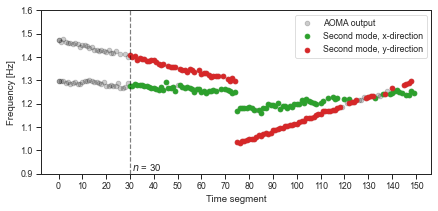

In [70]:
fig, axs = plt.subplots(figsize = (7,3))

for k, freq in enumerate(freqs_out):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

axs.scatter(np.array(mode_traces_mtc1_above_sorted[1].time_seg), mode_traces_mtc1_above_sorted[1].frequencies, label = 'Second mode, x-direction', color = 'tab:green')
axs.scatter(np.array(mode_traces_mtc1_above_sorted[0].time_seg), mode_traces_mtc1_above_sorted[0].frequencies, label = 'Second mode, y-direction', color = 'tab:red')



axs.set_xticks(np.arange(0, 151,10))
axs.set_ylim((0.9, 1.6))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()
axs.plot([30, 30], [0, 1.6], linestyle = 'dashed', color = 'black', alpha = 0.5)
axs.annotate('$n$ = 30', xy = (31, 0.91))

fig.savefig('./figures_flipped/mtc1_tracking', dpi = 400, bbox_inches = 'tight')

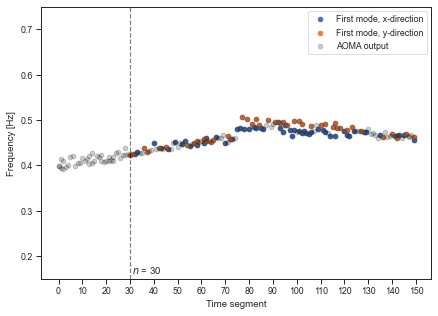

In [21]:
fig, axs = plt.subplots(figsize = (7,5))

axs.scatter(np.array(mode_traces_mtc1_below_sorted[1].time_seg), mode_traces_mtc1_below_sorted[1].frequencies, label = 'First mode, x-direction', color = 'C0')
axs.scatter(np.array(mode_traces_mtc1_below_sorted[0].time_seg), mode_traces_mtc1_below_sorted[0].frequencies, label = 'First mode, y-direction', color = 'C1')

for k, freq in enumerate(freqs_out):
    if k == 0: axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

axs.set_xticks(np.arange(0, 151,10))
axs.set_ylim((0.15, 0.75))
axs.set_xlabel('Time segment')
axs.set_ylabel('Frequency [Hz]')
axs.legend()
axs.plot([30, 30], [0, 1.6], linestyle = 'dashed', color = 'black', alpha = 0.5)
axs.annotate('$n$ = 30', xy = (31, 0.16))

fig.savefig('./figures/mtc1_tracking_below', dpi = 400, bbox_inches = 'tight')

### MTC1 count traces with upgraded initial phase

In [117]:
n_test = np.array([20, 25, 30, 35, 40])

n_trace = np.zeros((10, n_test.shape[0]+1))

for run in range(0, 10):
    n_trace[run, 0] = run +1
    for i, ni in enumerate(n_test):

        datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
        freqs_outi = datai['arr_0']
        phis_outi = datai['arr_1']

        freqs_initiali = freqs_outi[:ni]
        phis_initiali = phis_outi[:ni]

        mode_tracesi = tk.get_initial_modes2(freqs_initiali, phis_initiali)

        n_trace[run, i+1] += len(mode_tracesi)

In [118]:
#Latex formating
for row in n_trace:
    print(''+str(int(row[0]))+' & '+'\g{'+str(int(row[1]))+'} & '+'\g{'+str(int(row[2]))+'} & '+'\g{'+str(int(row[3]))+'} & '+'\g{'+str(int(row[4]))+'} & '+'\g{'+str(int(row[5]))+"} \\"+ "\\")

1 & \g{2} & \g{2} & \g{2} & \g{2} & \g{4} \\
2 & \g{2} & \g{4} & \g{4} & \g{4} & \g{4} \\
3 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\
4 & \g{2} & \g{2} & \g{2} & \g{4} & \g{4} \\
5 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\
6 & \g{2} & \g{4} & \g{4} & \g{4} & \g{4} \\
7 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\
8 & \g{2} & \g{2} & \g{4} & \g{4} & \g{4} \\
9 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\
10 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\


In [119]:
#Without split
n_test = np.array([20, 25, 30, 35, 40])

n_trace = np.zeros((10, n_test.shape[0]+1))

for run in range(0, 10):
    n_trace[run, 0] = run + 1 
    for i, ni in enumerate(n_test):

        datai = np.load('./test_results_flipped/test_3_run_'+str(run)+'_flipped.npz',allow_pickle=True)
        freqs_outi = datai['arr_0']
        phis_outi = datai['arr_1']

        freqs_initiali = freqs_outi[:ni]
        phis_initiali = phis_outi[:ni]

        mode_tracesi= tk.get_initial_modes(freqs_initiali, phis_initiali)

        n_trace[run, i+1] += len(mode_tracesi)

In [120]:
#Latex formating
for row in n_trace:
    print(''+str(int(row[0]))+' & '+'\g{'+str(int(row[1]))+'} & '+'\g{'+str(int(row[2]))+'} & '+'\g{'+str(int(row[3]))+'} & '+'\g{'+str(int(row[4]))+'} & '+'\g{'+str(int(row[5]))+"} \\"+ "\\")
    #print(str(int(row[0]))+' & '+str(int(row[1]))+' & '+str(int(row[2]))+' & '+str(int(row[3]))+' & '+str(int(row[4]))+' & '+str(int(row[5]))+" \\"+ "\\")

1 & \g{3} & \g{3} & \g{3} & \g{3} & \g{3} \\
2 & \g{3} & \g{4} & \g{4} & \g{4} & \g{4} \\
3 & \g{3} & \g{4} & \g{4} & \g{4} & \g{4} \\
4 & \g{3} & \g{3} & \g{3} & \g{3} & \g{3} \\
5 & \g{3} & \g{3} & \g{4} & \g{4} & \g{3} \\
6 & \g{3} & \g{4} & \g{4} & \g{4} & \g{4} \\
7 & \g{3} & \g{4} & \g{4} & \g{4} & \g{4} \\
8 & \g{3} & \g{3} & \g{4} & \g{4} & \g{4} \\
9 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\
10 & \g{4} & \g{4} & \g{4} & \g{4} & \g{4} \\


### Favarelli tracking

In [87]:
data = np.load('./test_results_flipped/test_3_run_'+str(3)+'_flipped.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [88]:
freqs_tracked = tk.perform_tracking_favarelli(freqs_out, Nt = 25, N_lim = 10,  Bf = 0.1, epsilon = 0.7, sf = 0.01)
print(freqs_tracked.shape)

(3, 125)


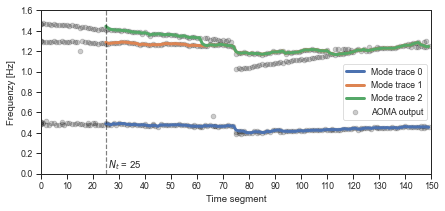

In [91]:
fig, ax = plt.subplots(figsize = (7,3))

t = np.arange(25,150)

for i, freqs in enumerate(freqs_tracked):
    ax.plot(t, freqs, label = 'Mode trace {}'.format(i), linewidth = 3)

for k, freq in enumerate(freqs_out):
    if k == 0: ax.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2, label = 'AOMA output')
    ax.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)

ax.legend()
ax.set_xlabel('Time segment')
ax.set_ylabel('Frequenzy [Hz]')
ax.set_xticks(np.arange(0, 151, 10))
ax.plot([25, 25], [0, 1.6], linestyle = 'dashed', color = 'black', alpha = 0.5)
ax.set_ylim((0, 1.6))
ax.annotate('$N_{t}$ = 25', xy = (26, 0.05))

ax.set_xlim([0, 150])

fig.savefig('./figures_flipped/favarelli2021_tracking', dpi = 400, bbox_inches = 'tight')

### CTD with Cabboi

In [3]:
n_missed_tot_above_mtc2= []
n_missed_tot_below_mtc2 = []

ntrace = np.arange(0,2)

run_above = np.array([])
run_below = np.array([])

for i in range(40):
    datai = np.load('./test_results/test_3_run_'+str(i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_outi_above, freqs_outi_below, phis_outi_above, phis_outi_below = divide_modes(freqs_outi, phis_outi, freq_lim=0.8)

    n_skipped_seg_clusteringi,_,_,_= n_skipped_time_seg_clustering2(freqs_out=freqs_outi, phis_out=phis_outi, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2)
    n_skipped_seg_clusteringi_above = n_skipped_seg_clusteringi[2:]
    n_skipped_seg_clusteringi_below = n_skipped_seg_clusteringi[:2]
    
    mode_traces_mtc2_above = tk.perform_tracking_continuous(freqs_outi_above, phis_outi_above, tcheck=13, m=14, update_thresholds=False, update_ref=True, df_max=0.15, dmac_max=0.2)

    if mode_traces_mtc2_above[0].isphysical and mode_traces_mtc2_above[1].isphysical:
        n_missed_tot_above_temp = []
        run_above = np.append(run_above, i)
        mode_traces_mtc2_above_sorted = tk.sort_traces(np.array(mode_traces_mtc2_above[:2]), true_f[0,2:], true_phi[2:,:,0])
        for j, trace in enumerate(mode_traces_mtc2_above_sorted):
            n_missed_tot_above_temp.append(trace.n_skipped_time_seg - n_skipped_seg_clusteringi_above[j])

        n_missed_tot_above_mtc2.append(n_missed_tot_above_temp)

    mode_traces_mtc2_below = tk.perform_tracking_continuous(freqs_outi_below, phis_outi_below, tcheck=13, m=14, update_thresholds=False, update_ref=True, df_max=0.15, dmac_max=0.2)
    if mode_traces_mtc2_below[0].isphysical and mode_traces_mtc2_below[1].isphysical:
        n_missed_tot_below_temp = []
        run_below = np.append(run_below, i) 
        mode_traces_mtc2_below_sorted = tk.sort_traces(np.array(mode_traces_mtc2_below[:2]), true_f[0,:2], true_phi[:2,:,0])
        for j, trace in enumerate(mode_traces_mtc2_below_sorted):
            n_missed_tot_below_temp.append(trace.n_skipped_time_seg - n_skipped_seg_clusteringi_below[j])

        n_missed_tot_below_mtc2.append(n_missed_tot_below_temp)

In [4]:
print(np.array(n_missed_tot_above_mtc2))
print(run_above)

[[ 0.  0.]
 [ 3.  1.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  0.]
 [ 2.  3.]
 [ 4.  3.]
 [ 0.  8.]
 [ 4.  5.]
 [ 5.  1.]
 [ 1.  0.]
 [-1.  4.]
 [ 0.  5.]
 [ 4.  0.]
 [ 2.  0.]
 [ 0. -2.]
 [ 0. -2.]
 [ 0.  5.]
 [ 2.  5.]
 [ 0.  1.]
 [ 7. -3.]
 [ 3.  0.]
 [ 1.  1.]
 [ 3.  6.]
 [ 0.  1.]
 [ 2.  3.]
 [ 1.  2.]
 [ 0.  4.]]
[ 0.  1.  4.  5.  6.  8. 11. 12. 13. 14. 15. 16. 17. 18. 20. 24. 26. 27.
 28. 31. 32. 33. 34. 35. 36. 37. 38. 39.]


In [5]:
print(np.array(n_missed_tot_below_mtc2))
print(run_below)

[[11. 19.]
 [ 8. 24.]
 [16. 25.]
 [15. 26.]
 [ 8. 23.]
 [13. 20.]
 [16. 13.]
 [11.  7.]
 [15. 15.]]
[ 0.  3.  5.  9. 14. 15. 29. 31. 34.]


In [6]:
info_below = np.empty((run_below.shape[0], 3))
info_above = np.empty((run_above.shape[0], 3))

info_above[:,0] = run_above
info_below[:,0] = run_below

info_above[:,1:3] = n_missed_tot_above_mtc2
info_below[:,1:3] = n_missed_tot_below_mtc2

for i, (runi, mode2, mode3) in enumerate(info_above):
    missedrow = True
    for j, (runj, mode0, mode1) in enumerate(info_below):
        if runi == runj:
            missedrow = False
            print(str(int(runi))+' & '+ str(int(mode0)) +' & '+ str(int(mode1))+' & '+ str(int(mode2))+' & '+ str(int(mode3))+" \\"+ "\\")

    if missedrow:
        print(str(int(runi))+' & '+ '-' +' & '+ '-'+' & '+ str(int(mode2))+' & '+ str(int(mode3))+" \\"+ "\\")

0 & 11 & 19 & 0 & 0 \\
1 & - & - & 3 & 1 \\
4 & - & - & 1 & 6 \\
5 & 16 & 25 & 2 & 6 \\
6 & - & - & 3 & 0 \\
8 & - & - & 2 & 3 \\
11 & - & - & 4 & 3 \\
12 & - & - & 0 & 8 \\
13 & - & - & 4 & 5 \\
14 & 8 & 23 & 5 & 1 \\
15 & 13 & 20 & 1 & 0 \\
16 & - & - & -1 & 4 \\
17 & - & - & 0 & 5 \\
18 & - & - & 4 & 0 \\
20 & - & - & 2 & 0 \\
24 & - & - & 0 & -2 \\
26 & - & - & 0 & -2 \\
27 & - & - & 0 & 5 \\
28 & - & - & 2 & 5 \\
31 & 11 & 7 & 0 & 1 \\
32 & - & - & 7 & -3 \\
33 & - & - & 3 & 0 \\
34 & 15 & 15 & 1 & 1 \\
35 & - & - & 3 & 6 \\
36 & - & - & 0 & 1 \\
37 & - & - & 2 & 3 \\
38 & - & - & 1 & 2 \\
39 & - & - & 0 & 4 \\


In [4]:
data = np.load('./test_results/test_3_run_'+str(4)+'.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

(array([100.,  89.,  24.,  20.]), array([[ 0.39305581, -1.        ,  0.39900695, ..., -1.        ,
         0.46746382,  0.46778592],
       [-1.        ,  0.41363178, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.03238304,  1.02604716,  1.03848117, ...,  1.29849865,
        -1.        , -1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), array([[ 0.00100863, -1.        ,  0.00882954, ..., -1.        ,
         0.00794939,  0.00988001],
       [-1.        ,  0.00240292, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.00223814,  0.00737591,  0.00116565, ...,  0.00255146,
        -1.        , -1.        ],
       ...,
       [ 0.        ,  0.        ,  0.   

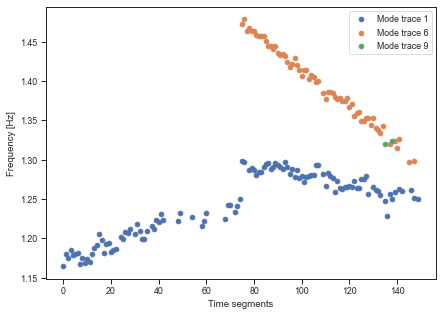

In [6]:
freq_lim = 0.8

freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=freq_lim)

mode_traces_ctd = tk.perform_tracking_continuous(freqs_out_above, phis_out_above, tcheck=13, m = 8, df_max=0.3, dmac_max=0.5, update_ref=True, update_thresholds=True)
plot_physical_traces(mode_traces_ctd)
n_skipped_seg_clustering_ctd = n_skipped_time_seg_clustering2(freqs_out=freqs_out, phis_out=phis_out, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2, printinfo=False)
print(n_skipped_seg_clustering_ctd)
for i, trace in enumerate(mode_traces_ctd):
    if trace.isphysical: 
        print(trace.n_skipped_time_seg)

print(n_skipped_seg_clustering_ctd[:2])

In [6]:
m_test = np.array([5, 8, 11, 14, 17, 20, 26, 32])
tcheck_test = np.array([5,8,10,13,15,18,20])

### With both update thresholds and update ref frequency

In [11]:
tend = 150

freq_lim = 0.8

n_trace_above = []
n_trace_below = []

n_missed_above = []
n_missed_below = []

for run_i in range(10):
    datai = np.load('./test_results/test_3_run_'+str(run_i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_outi_above, freqs_outi_below, phis_outi_above, phis_outi_below = divide_modes(freqs_outi, phis_outi, freq_lim=freq_lim)

    n_tracesi_above = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_tracesi_below = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

    n_missedi_above = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_missedi_below = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

    for l, m in enumerate(m_test):
        for j, tcheck in enumerate(tcheck_test):
            mode_traces_ctdi_above = tk.perform_tracking_continuous(freqs_outi_above, phis_outi_above, tcheck=tcheck, m = m, df_max=0.1, dmac_max=0.1, update_ref=True, update_thresholds=True)
            mode_traces_ctdi_below = tk.perform_tracking_continuous(freqs_outi_below, phis_outi_below, tcheck=tcheck, m = m, df_max=0.1, dmac_max=0.1, update_ref=True, update_thresholds=True)

            n_skipped_seg_clusteringi,_,_,_ = n_skipped_time_seg_clustering2(freqs_out=freqs_outi, phis_out=phis_outi, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2)

            n_skipped_seg_clusteringi_above = n_skipped_seg_clusteringi[2:]
            n_skipped_seg_clusteringi_below = n_skipped_seg_clusteringi[:2]
            
            n_missedi_above[l, j] = - np.sum(n_skipped_seg_clusteringi_above)
            n_missedi_below[l, j] = - np.sum(n_skipped_seg_clusteringi_below)

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_ctdi_above):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi_above[l, j] += 1
                    n_missedi_above[l, j] += trace.n_skipped_time_seg

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_ctdi_below):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi_below[l, j] += 1
                    n_missedi_below[l, j] += trace.n_skipped_time_seg

    n_missed_above.append(n_missedi_above)
    n_missed_below.append(n_missedi_below)

    n_trace_above.append(n_tracesi_above)
    n_trace_below.append(n_tracesi_below)

In [12]:
np.savez('./result_ctd/n_missed_above',n_missed_above)
np.savez('./result_ctd/n_missed_below',n_missed_below)

np.savez('./result_ctd/n_trace_above',n_trace_above)
np.savez('./result_ctd/n_trace_below',n_trace_below)

In [13]:
n_missed_dict_above = np.load('./result_ctd/n_missed_above.npz',allow_pickle=True)
n_missed_dict_below = np.load('./result_ctd/n_missed_below.npz',allow_pickle=True)
n_missed_above = n_missed_dict_above['arr_0']
n_missed_below = n_missed_dict_below['arr_0']

n_trace_dict_above = np.load('./result_ctd/n_trace_above.npz',allow_pickle=True)
n_trace_dict_below = np.load('./result_ctd/n_trace_below.npz',allow_pickle=True)
n_trace_above = n_trace_dict_above['arr_0']
n_trace_below = n_trace_dict_below['arr_0']

In [14]:
n_trace_above_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_trace_below_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

n_missed_above_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_missed_below_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))


for i in range(10):
    n_trace_above_avg += n_trace_above[i]
    n_trace_below_avg += n_trace_below[i]

    n_missed_above_avg += n_missed_above[i]
    n_missed_below_avg += n_missed_below[i]

n_trace_above_avg /= 10
n_trace_below_avg /= 10

n_missed_above_avg /= 10
n_missed_below_avg /= 10

print(n_trace_above_avg)
print(n_trace_below_avg)

print(n_missed_above_avg)
print(n_missed_below_avg)


[[1.5 1.8 1.8 2.3 2.6 2.3 2.5]
 [1.3 1.9 1.8 2.4 2.4 2.2 2.4]
 [1.1 1.8 1.8 2.2 2.4 2.3 2.2]
 [0.5 1.6 1.7 2.2 2.2 2.2 2.2]
 [0.6 1.3 2.  2.4 2.4 2.4 2.3]
 [0.7 1.2 2.  2.5 2.4 2.3 2.2]
 [0.7 1.2 1.4 1.7 2.5 2.4 2.3]
 [0.5 1.  0.9 1.2 2.3 1.4 2.1]]
[[1.2 0.7 1.2 1.8 3.  2.9 4.1]
 [0.7 0.5 1.4 2.3 3.8 3.4 4.4]
 [0.7 0.9 1.5 1.7 3.3 2.9 4.3]
 [0.9 0.6 1.4 2.3 3.4 3.6 4.4]
 [0.8 0.7 1.4 2.  3.6 3.8 4.7]
 [0.6 0.6 1.5 1.7 2.4 2.6 3.7]
 [0.4 0.5 1.2 1.8 3.1 2.8 4.3]
 [0.3 0.3 0.9 1.4 2.6 2.9 4.2]]
[[117.3 111.5 105.4 127.2 182.3 127.2 156.4]
 [ 89.1 131.8 115.5 139.3 150.7 109.6 134.6]
 [ 79.1 113.7  87.7 112.5 131.6 116.4 102. ]
 [ 20.   95.1  92.6 119.2 119.   96.6  90.1]
 [  2.9  52.8 131.3 144.4 143.9 121.3 106.9]
 [ 41.9  69.2 135.6 166.5 152.3 126.3 111.9]
 [ 31.   57.5  72.6  86.5 166.6 144.2 125.9]
 [  0.4  27.   12.3  21.2 139.9  23.9  99.4]]
[[  -4.2  -78.6  -20.8   48.7  205.6  184.4  340.2]
 [ -78.3 -108.5    8.2  116.5  311.7  253.3  387.8]
 [ -78.2  -51.8   31.4   46.5  256.8 

In [24]:
sns.set_theme(context='paper',font_scale=1.5, style = 'ticks', color_codes='deep')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

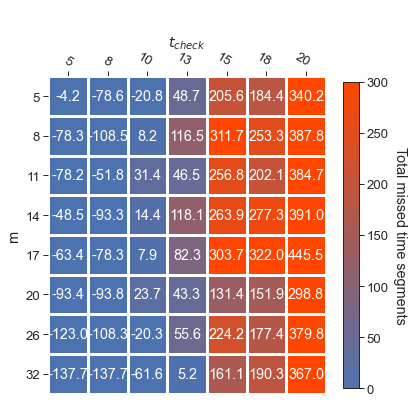

In [25]:
_, fig = plot_result_heatmap_CTD(n_missed_below_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)

fig.savefig('./result_ctd/n_missed_below_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

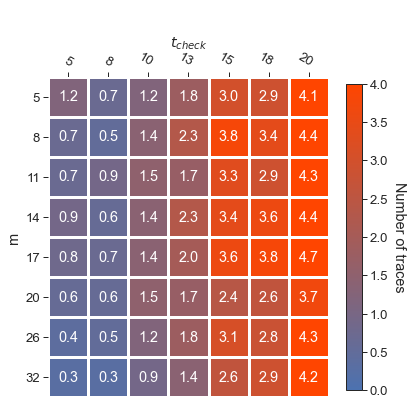

In [26]:
_, fig = plot_result_heatmap_CTD(n_trace_below_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min = 0, max = 4)
fig.savefig('./result_ctd/n_trace_below_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

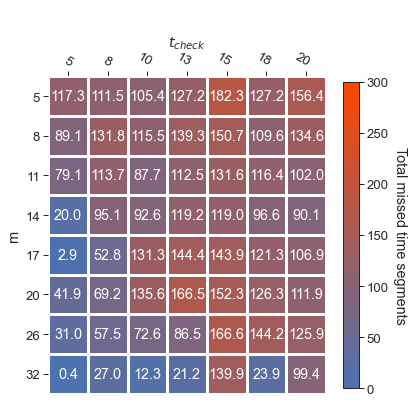

In [27]:
_, fig = plot_result_heatmap_CTD(n_missed_above_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)
fig.savefig('./result_ctd/n_missed_above_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

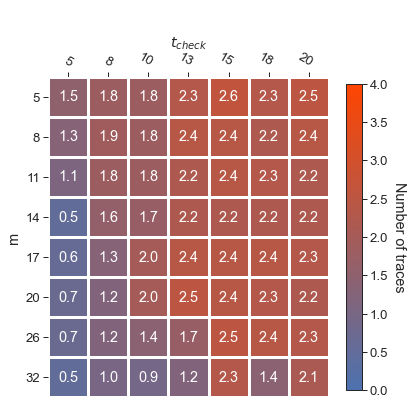

In [22]:
_, fig = plot_result_heatmap_CTD(n_trace_above_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min = 0, max = 4)
fig.savefig('./result_ctd/n_trace_above_avg', dpi = 400, bbox_inches = 'tight')

### Without update thresholds

In [32]:
tend = 150

freq_lim = 0.8

n_trace_above_static_threshold = []
n_trace_below_static_threshold = []

n_missed_above_static_threshold = []
n_missed_below_static_threshold = []

for run_i in range(10):
    datai = np.load('./test_results/test_3_run_'+str(run_i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    freqs_outi_above, freqs_outi_below, phis_outi_above, phis_outi_below = divide_modes(freqs_outi, phis_outi, freq_lim=freq_lim)

    n_tracesi_above_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_tracesi_below_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

    n_missedi_above_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_missedi_below_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

    for l, m in enumerate(m_test):
        for j, tcheck in enumerate(tcheck_test):
            mode_traces_ctdi_above = tk.perform_tracking_continuous(freqs_outi_above, phis_outi_above, tcheck=tcheck, m = m, df_max=0.15, dmac_max=0.2, update_ref=True, update_thresholds=False)
            mode_traces_ctdi_below = tk.perform_tracking_continuous(freqs_outi_below, phis_outi_below, tcheck=tcheck, m = m, df_max=0.15, dmac_max=0.2, update_ref=True, update_thresholds=False)

            n_skipped_seg_clusteringi,_,_,_ = n_skipped_time_seg_clustering2(freqs_out=freqs_outi, phis_out=phis_outi, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2)

            n_skipped_seg_clusteringi_above = n_skipped_seg_clusteringi[2:]
            n_skipped_seg_clusteringi_below = n_skipped_seg_clusteringi[:2]
            
            n_missedi_above_static_threshold[l, j] = - np.sum(n_skipped_seg_clusteringi_above)
            n_missedi_below_static_threshold[l, j] = - np.sum(n_skipped_seg_clusteringi_below)

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_ctdi_above):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi_above_static_threshold[l, j] += 1
                    n_missedi_above_static_threshold[l, j] += trace.n_skipped_time_seg

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_ctdi_below):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi_below_static_threshold[l, j] += 1
                    n_missedi_below_static_threshold[l, j] += trace.n_skipped_time_seg

    n_missed_above_static_threshold.append(n_missedi_above_static_threshold)
    n_missed_below_static_threshold.append(n_missedi_below_static_threshold)

    n_trace_above_static_threshold.append(n_tracesi_above_static_threshold)
    n_trace_below_static_threshold.append(n_tracesi_below_static_threshold)

In [33]:
np.savez('./result_ctd/n_missed_above_static_threshold',n_missed_above_static_threshold)
np.savez('./result_ctd/n_missed_below_static_threshold',n_missed_below_static_threshold)

np.savez('./result_ctd/n_trace_above_static_threshold',n_trace_above_static_threshold)
np.savez('./result_ctd/n_trace_below_static_threshold',n_trace_below_static_threshold)

In [34]:
n_missed_dict_above_static_threshold = np.load('./result_ctd/n_missed_above_static_threshold.npz',allow_pickle=True)
n_missed_dict_below_static_threshold = np.load('./result_ctd/n_missed_below_static_threshold.npz',allow_pickle=True)
n_missed_above_static_threshold = n_missed_dict_above_static_threshold['arr_0']
n_missed_below_static_threshold = n_missed_dict_below_static_threshold['arr_0']

n_trace_dict_above_static_threshold = np.load('./result_ctd/n_trace_above_static_threshold.npz',allow_pickle=True)
n_trace_dict_below_static_threshold = np.load('./result_ctd/n_trace_below_static_threshold.npz',allow_pickle=True)
n_trace_above_static_threshold = n_trace_dict_above_static_threshold['arr_0']
n_trace_below_static_threshold = n_trace_dict_below_static_threshold['arr_0']

In [35]:
n_trace_above_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_trace_below_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

n_missed_above_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_missed_below_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))


for i in range(10):
    n_trace_above_static_threshold_avg += n_trace_above_static_threshold[i]
    n_trace_below_static_threshold_avg += n_trace_below_static_threshold[i]

    n_missed_above_static_threshold_avg += n_missed_above_static_threshold[i]
    n_missed_below_static_threshold_avg += n_missed_below_static_threshold[i]

n_trace_above_static_threshold_avg /= 10
n_trace_below_static_threshold_avg /= 10

n_missed_above_static_threshold_avg /= 10
n_missed_below_static_threshold_avg /= 10

print(n_trace_above_static_threshold_avg)
print(n_trace_below_static_threshold_avg)

print(n_missed_above_static_threshold_avg)
print(n_missed_below_static_threshold_avg)

[[0.9 1.9 1.9 2.3 2.3 2.2 2.2]
 [0.4 1.5 1.8 2.4 2.4 2.2 2.3]
 [0.9 1.7 1.9 2.1 2.3 2.1 2.2]
 [0.5 1.9 2.  2.1 2.1 2.  2.2]
 [0.5 1.5 2.  2.3 2.2 2.1 2.2]
 [0.4 1.3 2.  2.2 2.3 2.1 2.2]
 [0.9 1.6 1.8 2.1 2.4 2.1 2.2]
 [0.3 1.1 1.2 1.3 2.3 1.1 2.1]]
[[0.5 0.8 1.4 2.3 2.8 3.3 4. ]
 [0.3 0.1 1.1 1.9 2.9 3.4 4.3]
 [0.2 0.4 1.1 1.6 2.5 2.7 3.8]
 [0.3 0.2 0.8 1.8 2.7 3.4 3.8]
 [0.2 0.5 1.4 2.  2.9 3.5 4.3]
 [0.4 0.2 1.2 2.2 2.8 2.8 3.7]
 [0.1 0.3 0.8 1.2 2.6 3.  4. ]
 [0.2 0.4 1.1 1.6 2.4 3.  4.2]]
[[ 16.3  47.9  48.   82.6  82.6  67.7  67.7]
 [-26.2  16.3  36.2  81.2  81.3  51.5  66.4]
 [ 35.   68.   73.1  90.7 110.4  80.6  95.5]
 [-17.1  50.3  40.9  43.7  43.8  17.9  47.5]
 [ -5.2  52.3  87.3 107.9 105.1  78.2  93.1]
 [ -8.1  34.3  93.9 111.6 114.8  85.   99.9]
 [ 22.8  58.5  70.3  90.6 125.7  81.2  96.1]
 [-28.8  28.   30.8  33.9 131.   -7.8 101.4]]
[[-108.   -67.9  -14.3   90.6  155.4  217.9  312.3]
 [-137.6 -167.4  -46.1   42.3  179.1  238.5  360.1]
 [-152.5 -123.9  -37.3   18.8  131.9 

In [36]:
sns.set_theme(context='paper',font_scale=1.5, style = 'ticks', color_codes='deep')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

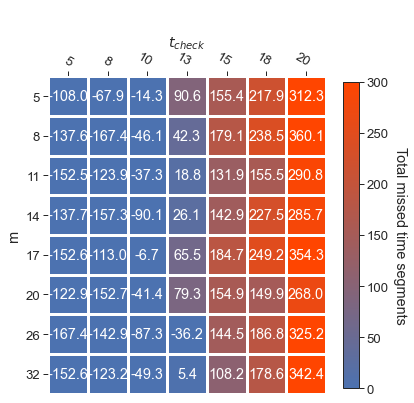

In [37]:
_, fig = plot_result_heatmap_CTD(n_missed_below_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)

fig.savefig('./result_ctd/n_missed_below_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

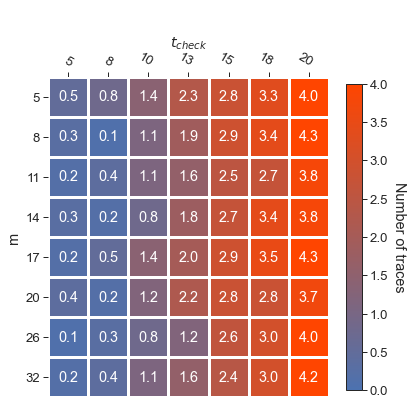

In [41]:
_, fig = plot_result_heatmap_CTD(n_trace_below_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min=0, max=4)

fig.savefig('./result_ctd/n_trace_below_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

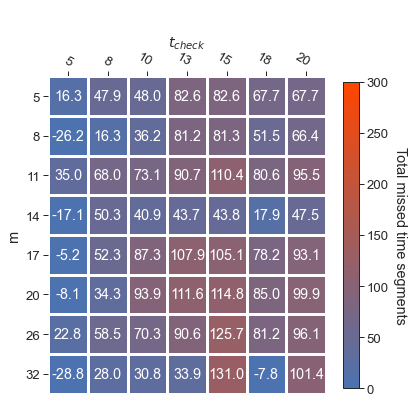

In [39]:
_, fig = plot_result_heatmap_CTD(n_missed_above_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)

fig.savefig('./result_ctd/n_missed_above_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

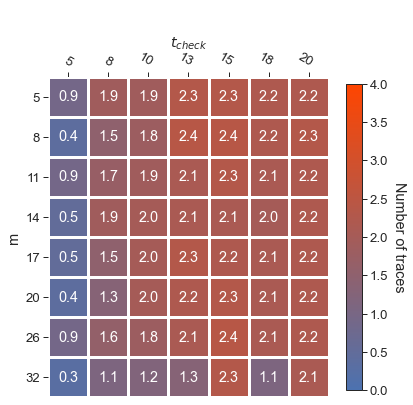

In [42]:
_, fig = plot_result_heatmap_CTD(n_trace_above_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min=0, max=4)

fig.savefig('./result_ctd/n_trace_above_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

### Same tests as above but not seperating the moded based on frequency (as done in modal tracking concept 1)

In [183]:
data = np.load('./test_results/test_3_run_'+str(0)+'.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [186]:
mode_traces_ctd = tk.perform_tracking_continuous(freqs_out, phis_out, tcheck=13, m = 14, df_max=0.1, dmac_max=0.1, update_ref=True, update_thresholds=True)

<AxesSubplot:xlabel='Time segments', ylabel='Frequency [Hz]'>

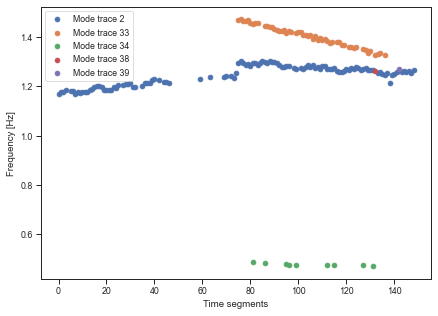

In [185]:
plot_physical_traces(mode_traces_ctd)

In [4]:
m_test = np.array([5, 8, 11, 14, 17, 20, 26, 32])
tcheck_test = np.array([5,8,10,13,15,18,20])

In [7]:
tend = 150

n_traces_static_threshold = []
n_missed_static_threshold = []

n_traces = []
n_missed = []


for run_i in range(10):
    datai = np.load('./test_results/test_3_run_'+str(run_i)+'.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    n_tracesi_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_missedi_static_threshold = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

    n_tracesi = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
    n_missedi = np.zeros((m_test.shape[0], tcheck_test.shape[0]))


    for l, m in enumerate(m_test):
        for j, tcheck in enumerate(tcheck_test):
            mode_traces_static_threshold_ctd = tk.perform_tracking_continuous(freqs_outi, phis_outi, tcheck=tcheck, m = m, df_max=0.15, dmac_max=0.2, update_ref=True, update_thresholds=False)
            mode_traces_ctd = tk.perform_tracking_continuous(freqs_outi, phis_outi, tcheck=tcheck, m = m, df_max=0.1, dmac_max=0.1, update_ref=True, update_thresholds=True)

            n_skipped_seg_clustering,_,_,_ = n_skipped_time_seg_clustering2(freqs_out=freqs_outi, phis_out=phis_outi, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2)

            n_missedi_static_threshold[l, j] = - np.sum(n_skipped_seg_clustering)
            n_missedi[l, j] = - np.sum(n_skipped_seg_clustering)

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_static_threshold_ctd):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi_static_threshold[l, j] += 1
                    n_missedi_static_threshold[l, j] += trace.n_skipped_time_seg

            #Count how many physical traces that the algorithm yields, excluding those at a distance in time lower than tcheck to the end
            for i, trace in enumerate(mode_traces_ctd):
                if trace.isphysical and tend - trace.time_seg[0] > tcheck:
                    n_tracesi[l, j] += 1
                    n_missedi[l, j] += trace.n_skipped_time_seg

    n_missed_static_threshold.append(n_missedi_static_threshold)
    n_traces_static_threshold.append(n_tracesi_static_threshold)

    n_missed.append(n_missedi)
    n_traces.append(n_tracesi)

In [8]:
np.savez('./result_ctd/n_missed_static_threshold',n_missed_static_threshold)
np.savez('./result_ctd/n_traces_static_threshold',n_traces_static_threshold)

np.savez('./result_ctd/n_traces',n_traces)
np.savez('./result_ctd/n_missed',n_missed)

In [12]:
n_missed_dict_static_threshold = np.load('./result_ctd/n_missed_static_threshold.npz',allow_pickle=True)
n_missed_static_threshold = n_missed_dict_static_threshold['arr_0']
n_traces_dict_static_threshold = np.load('./result_ctd/n_traces_static_threshold.npz',allow_pickle=True)
n_traces_static_threshold = n_traces_dict_static_threshold['arr_0']

n_traces_dict = np.load('./result_ctd/n_traces.npz',allow_pickle=True)
n_traces = n_traces_dict['arr_0']
n_missed_dict = np.load('./result_ctd/n_missed.npz',allow_pickle=True)
n_missed = n_missed_dict['arr_0']

In [13]:
n_traces_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_missed_static_threshold_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))

n_traces_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))
n_missed_avg = np.zeros((m_test.shape[0], tcheck_test.shape[0]))


for i in range(10):
    n_traces_static_threshold_avg += n_traces_static_threshold[i]
    n_missed_static_threshold_avg += n_missed_static_threshold[i]

    n_missed_avg += n_missed[i]
    n_traces_avg += n_traces[i]

n_traces_static_threshold_avg /= 10
n_missed_static_threshold_avg /= 10

n_missed_avg /= 10
n_traces_avg /= 10

print(n_traces_static_threshold_avg)
print(n_missed_static_threshold_avg)

print(n_missed_avg)
print(n_traces_avg)

[[1.4 2.7 3.3 4.6 5.1 5.5 6.2]
 [0.7 1.6 2.9 4.3 5.3 5.6 6.6]
 [1.1 2.1 3.  3.7 4.8 4.8 6. ]
 [0.8 2.1 2.8 3.9 4.8 5.4 6. ]
 [0.7 2.  3.4 4.3 5.1 5.6 6.5]
 [0.8 1.5 3.2 4.4 5.1 4.9 5.9]
 [1.  1.9 2.6 3.3 5.  5.1 6.2]
 [0.5 1.5 2.3 2.9 4.7 4.1 6.3]]
[[ -91.7  -20.    33.7  173.2  238.   285.6  380. ]
 [-163.8 -151.1   -9.9  123.5  260.4  290.   426.5]
 [-117.5  -55.9   35.8  109.5  242.3  236.1  386.3]
 [-154.8 -107.   -49.2   69.8  186.7  245.4  333.2]
 [-157.8  -60.7   80.6  173.4  289.8  327.4  447.4]
 [-131.  -118.4   52.5  190.9  269.7  234.9  367.9]
 [-144.6  -84.4  -17.    54.4  270.2  268.   421.3]
 [-181.4  -95.2  -18.5   39.3  239.2  170.8  443.8]]
[[ 113.1   32.9   84.6  175.9  387.9  311.6  496.6]
 [  10.8   23.3  123.7  255.8  462.4  362.9  522.4]
 [   0.9   61.9  119.1  159.   388.4  318.5  486.7]
 [ -28.5    1.8  107.   237.3  382.9  373.9  481.1]
 [ -60.5  -25.5  139.2  226.7  447.6  443.3  552.4]
 [ -51.5  -24.6  159.3  209.8  283.7  278.2  410.7]
 [ -92.   -50.8   52.3

In [14]:
sns.set_theme(context='paper',font_scale=1.5, style = 'ticks', color_codes='deep')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

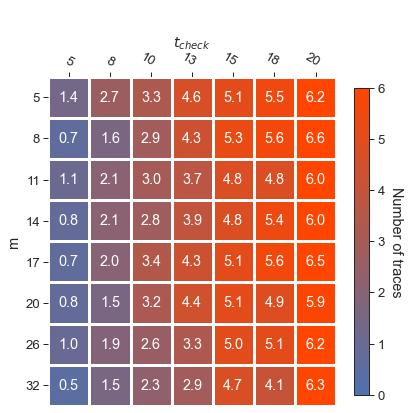

In [19]:
_, fig = plot_result_heatmap_CTD(n_traces_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min=0, max=6)

fig.savefig('./result_ctd/n_traces_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

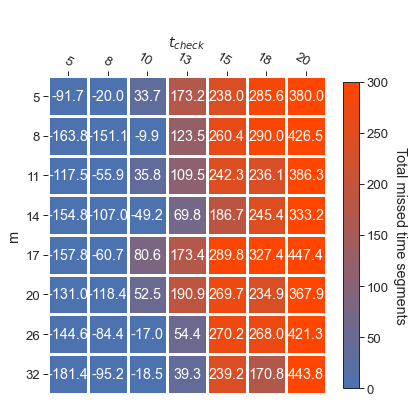

In [16]:
_, fig = plot_result_heatmap_CTD(n_missed_static_threshold_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)

fig.savefig('./result_ctd/n_missed_static_threshold_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

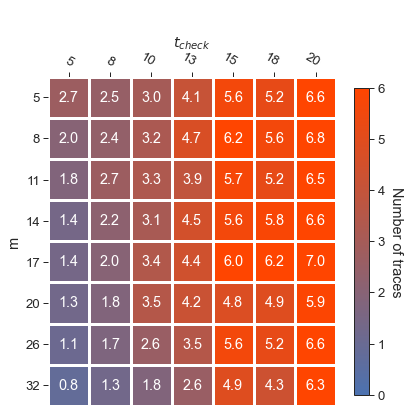

In [20]:
_, fig = plot_result_heatmap_CTD(n_traces_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Number of traces', min=0, max=6)

fig.savefig('./result_ctd/n_traces_avg', dpi = 400, bbox_inches = 'tight')

<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class 'matplotlib.text.Text'>
<class '

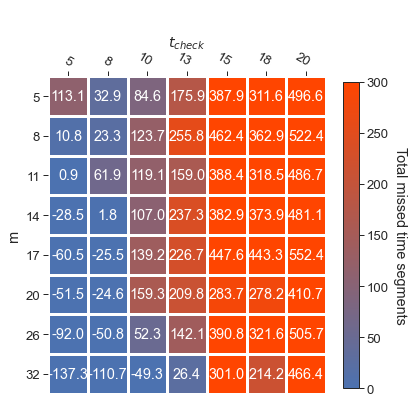

In [18]:
_, fig = plot_result_heatmap_CTD(n_missed_avg, m_test, tcheck_test, title=' ', n_decimalpoints='1',metric_title='Total missed time segments', min=0, max=300)

fig.savefig('./result_ctd/n_missed_avg', dpi = 400, bbox_inches = 'tight')